## P-153- Hourly Energy Consumption Forecast


Business Objective: PJM Hourly Energy Consumption Data PJM Interconnection LLC (PJM) is a regional transmission organization (RTO) in the United States. It is part of the Eastern Interconnection grid operating an electric transmission system serving all or parts of Delaware, Illinois, Indiana, Kentucky, Maryland, Michigan, New Jersey, North Carolina, Ohio, Pennsylvania, Tennessee, Virginia, West Virginia, and the District of Columbia.

The hourly power consumption data comes from PJM's website and are in megawatts (MW).

The regions have changed over the years so data may only appear for certain dates per region.

• Split the last year into a test set- can you build a model to predict energy consumption? 
• Find trends in energy consumption around hours of the day, holidays, or long term trends? 
• Understand how daily trends change depending of the time of year. Summer trends are very different than winter trends.
• Forecast for next 30 days.

### All the Lifecycle in a Data Science Project

- Data Analysis
- Feature Engineering
- Feature Extraction
- Model Building
- Model Deployment

In [1]:
# Importing some of the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

pjm=pd.read_csv("C:/Users/anike/Desktop/New folder/EXCELR PROJECT/P153 -- FORCASTING/PJMW_hourly.csv")
pjm

Datetime  PJMW_MW
0       2002-12-31 01:00:00   5077.0
1       2002-12-31 02:00:00   4939.0
2       2002-12-31 03:00:00   4885.0
3       2002-12-31 04:00:00   4857.0
4       2002-12-31 05:00:00   4930.0
...                     ...      ...
143201  2018-01-01 20:00:00   8401.0
143202  2018-01-01 21:00:00   8373.0
143203  2018-01-01 22:00:00   8238.0
143204  2018-01-01 23:00:00   7958.0
143205  2018-01-02 00:00:00   7691.0

[143206 rows x 2 columns]

In [3]:
# Making a copy

df=pjm.copy()
df

Datetime  PJMW_MW
0       2002-12-31 01:00:00   5077.0
1       2002-12-31 02:00:00   4939.0
2       2002-12-31 03:00:00   4885.0
3       2002-12-31 04:00:00   4857.0
4       2002-12-31 05:00:00   4930.0
...                     ...      ...
143201  2018-01-01 20:00:00   8401.0
143202  2018-01-01 21:00:00   8373.0
143203  2018-01-01 22:00:00   8238.0
143204  2018-01-01 23:00:00   7958.0
143205  2018-01-02 00:00:00   7691.0

[143206 rows x 2 columns]

### Exploratory Data Analysis [ EDA ]

--- In Time Series Analysis we will analyze to find out the below stuff
- Missing values
- Duplicated values
- Outlier Detection
- Feature Scaling
- Feature Extraction
- Correlation
- Skewness Removal
- Data Insights
- Stationarity Test
- Autocorrelation Function
- Partial Autocorrelation Function
- Lag plots
- Normal Distribution Analysis
- Relationshop between independent and dependent feature (PJMW_MW)

In [547]:
df.head()

Datetime  PJMW_MW
0  2002-12-31 01:00:00   5077.0
1  2002-12-31 02:00:00   4939.0
2  2002-12-31 03:00:00   4885.0
3  2002-12-31 04:00:00   4857.0
4  2002-12-31 05:00:00   4930.0

In [548]:
df.shape

(143206, 2)

In [549]:
df.size

286412

In [550]:
# Types of data

df.dtypes

Datetime     object
PJMW_MW     float64
dtype: object

In [551]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143206 entries, 0 to 143205
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  143206 non-null  object 
 1   PJMW_MW   143206 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [552]:
# Descriptive statistics

df.describe()

PJMW_MW
count  143206.000000
mean     5602.375089
std       979.142872
min       487.000000
25%      4907.000000
50%      5530.000000
75%      6252.000000
max      9594.000000

In [553]:
# Checking the duplicates 

df[df.duplicated()]

Empty DataFrame
Columns: [Datetime, PJMW_MW]
Index: []

In [561]:
df.skew(),df.kurt()

(PJMW_MW    0.334853
 dtype: float64,
 PJMW_MW   -0.221456
 dtype: float64)

### Observation :

- The 'PJMW_MW' column has positive skewness

- The 'PJMW_MW' column has negative kurtosis

- Conclusion: The data is positive skewed, platykurtic and doesn't follow normal distribution

<AxesSubplot:>

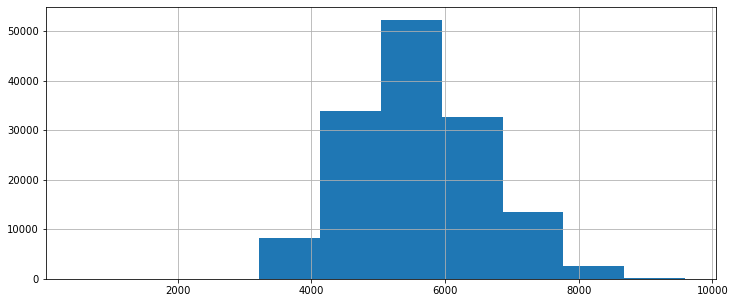

In [563]:
df['PJMW_MW'].hist(figsize=(12,5))


<AxesSubplot:xlabel='PJMW_MW', ylabel='Density'>

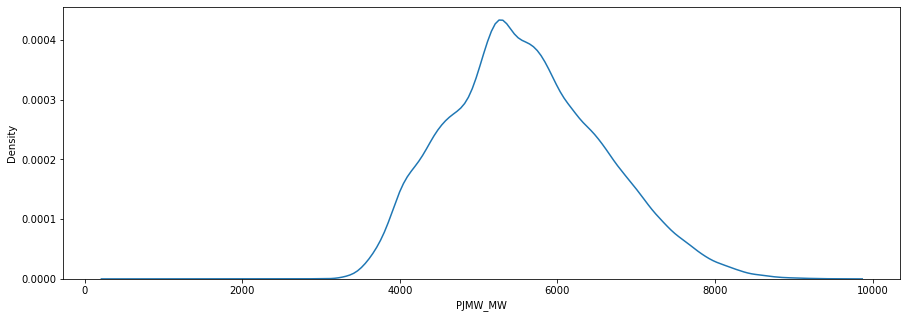

In [564]:
plt.figure(figsize=(15,5))
sns.distplot(df['PJMW_MW'], hist=False)

### Observation :

- Frequency is continious and As the number of Consumption increases, there is no gradual drop in the frequency of that number of consumption found to be decreasing.

In [4]:
# Here we can see the type of data for Datetime is different means it is object, so we have to convert it to datetime datatype.

df['Datetime']=pd.to_datetime(df['Datetime'])

In [5]:
# so just viewing the data dtype whether it has change or not

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143206 entries, 0 to 143205
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Datetime  143206 non-null  datetime64[ns]
 1   PJMW_MW   143206 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 MB


In [334]:
# Checking the null values 

df.isnull().sum()

Datetime    0
PJMW_MW     0
dtype: int64

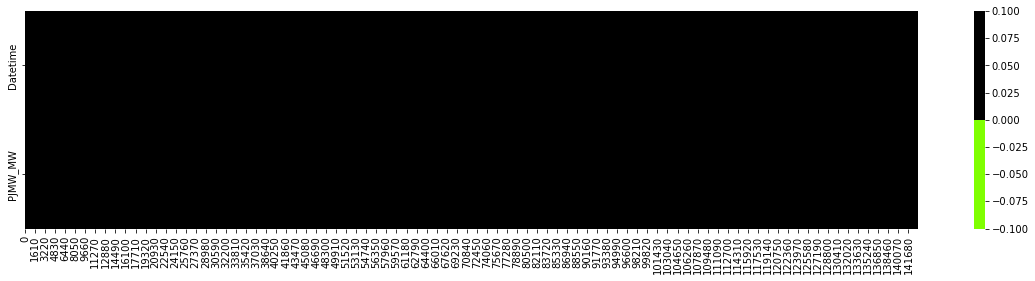

In [559]:
plt.figure(figsize=(20,4))
colors = ['#7FFF00','#000000']
sns.heatmap(df.isnull().T, cmap = sns.color_palette(colors))
plt.show()

### Observation : 
 No Null values are available.

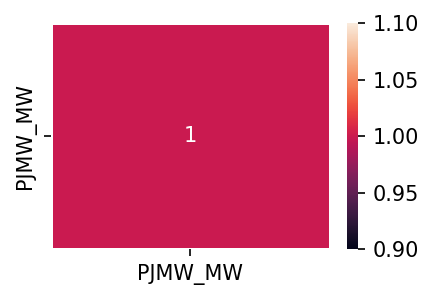

In [558]:
# correlation heatmap

#plt.subplots(figsize=(8,6))
plt.figure(dpi=150, figsize=(3,2))
sns.heatmap(df.corr(), annot=True, linewidths =.5)

plt.show()

Heatmap shows the data is highly correlated with each other

In [335]:
print (df.isnull().values.any())

False


In [6]:
# Setting the datetime as index

df.set_index('Datetime',inplace=True)

In [7]:
df.head()

PJMW_MW
Datetime                    
2002-12-31 01:00:00   5077.0
2002-12-31 02:00:00   4939.0
2002-12-31 03:00:00   4885.0
2002-12-31 04:00:00   4857.0
2002-12-31 05:00:00   4930.0

In [8]:
# Checking the duplicated values 

df[df.index.duplicated()]

PJMW_MW
Datetime                    
2014-11-02 02:00:00   4571.0
2015-11-01 02:00:00   3832.0
2016-11-06 02:00:00   4089.0
2017-11-05 02:00:00   3984.0

In [339]:
df['2014-11-02'].head()

PJMW_MW
Datetime                    
2014-11-02 01:00:00   4805.0
2014-11-02 02:00:00   4613.0
2014-11-02 02:00:00   4571.0
2014-11-02 03:00:00   4619.0
2014-11-02 04:00:00   4615.0

In [9]:
df=df.groupby(level=0).mean()
df['2014-11-02'].head()

PJMW_MW
Datetime                    
2014-11-02 00:00:00   4912.0
2014-11-02 01:00:00   4805.0
2014-11-02 02:00:00   4592.0
2014-11-02 03:00:00   4619.0
2014-11-02 04:00:00   4615.0

In [10]:
df[df.index.duplicated()]

Empty DataFrame
Columns: [PJMW_MW]
Index: []

Checking the missing data with respect to years,months,days and hours.

In [11]:
pd.date_range(df.index.min(), df.index.max(), freq="y").difference(df.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [12]:
pd.date_range(df.index.min(), df.index.max(), freq="m").difference(df.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [13]:
pd.date_range(df.index.min(), df.index.max(), freq="d").difference(df.index)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [14]:
pd.date_range(df.index.min(), df.index.max(), freq="H").difference(df.index)

DatetimeIndex(['2002-04-07 03:00:00', '2002-10-27 02:00:00',
               '2003-04-06 03:00:00', '2003-10-26 02:00:00',
               '2004-04-04 03:00:00', '2004-10-31 02:00:00',
               '2005-04-03 03:00:00', '2005-10-30 02:00:00',
               '2006-04-02 03:00:00', '2006-10-29 02:00:00',
               '2007-03-11 03:00:00', '2007-11-04 02:00:00',
               '2008-03-09 03:00:00', '2008-11-02 02:00:00',
               '2009-03-08 03:00:00', '2009-11-01 02:00:00',
               '2010-03-14 03:00:00', '2010-11-07 02:00:00',
               '2010-12-10 00:00:00', '2011-03-13 03:00:00',
               '2011-11-06 02:00:00', '2012-03-11 03:00:00',
               '2012-11-04 02:00:00', '2013-03-10 03:00:00',
               '2013-11-03 02:00:00', '2014-03-09 03:00:00',
               '2015-03-08 03:00:00', '2016-03-13 03:00:00',
               '2017-03-12 03:00:00', '2018-03-11 03:00:00'],
              dtype='datetime64[ns]', freq=None)

This are some of the missing data with respect to hours  

In [15]:
df['2002-04-07'].head()

PJMW_MW
Datetime                    
2002-04-07 00:00:00   5116.0
2002-04-07 01:00:00   5002.0
2002-04-07 02:00:00   4858.0
2002-04-07 04:00:00   4871.0
2002-04-07 05:00:00   4909.0

So here there is missing data with respect to hours . Hour 3 is missing. so it is necessary to fill it with some mean values.so data will not contain any of missing values.

In [16]:
new_date_range = pd.date_range(df.index.min(), df.index.max(), freq="H")
df=df.reindex(new_date_range)
df.head(150)

PJMW_MW
2002-04-01 01:00:00   4374.0
2002-04-01 02:00:00   4306.0
2002-04-01 03:00:00   4322.0
2002-04-01 04:00:00   4359.0
2002-04-01 05:00:00   4436.0
...                      ...
2002-04-07 02:00:00   4858.0
2002-04-07 03:00:00      NaN
2002-04-07 04:00:00   4871.0
2002-04-07 05:00:00   4909.0
2002-04-07 06:00:00   5038.0

[150 rows x 1 columns]

In [17]:
df['PJMW_MW']=df.PJMW_MW.interpolate(method='linear')
df.head(150)

PJMW_MW
2002-04-01 01:00:00   4374.0
2002-04-01 02:00:00   4306.0
2002-04-01 03:00:00   4322.0
2002-04-01 04:00:00   4359.0
2002-04-01 05:00:00   4436.0
...                      ...
2002-04-07 02:00:00   4858.0
2002-04-07 03:00:00   4864.5
2002-04-07 04:00:00   4871.0
2002-04-07 05:00:00   4909.0
2002-04-07 06:00:00   5038.0

[150 rows x 1 columns]

<AxesSubplot:>

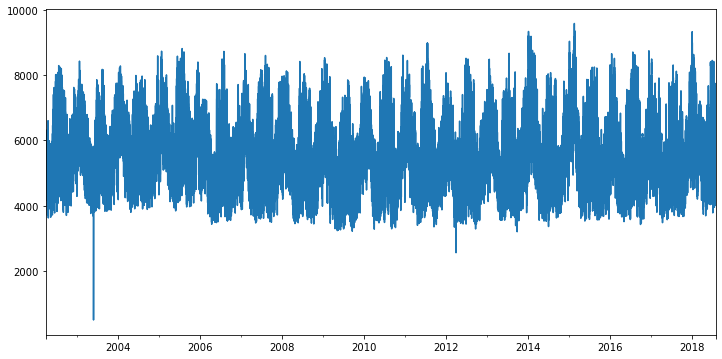

In [351]:
# Visualising through whole years

plt.figure(figsize=(12,6))
df['PJMW_MW'].plot()

# Here we can see that there is sudden drop down of mgawatts between  2002 and 2004.
# And we can see that in 2014 to 2016 there is sudden increase in megawatts

<AxesSubplot:>

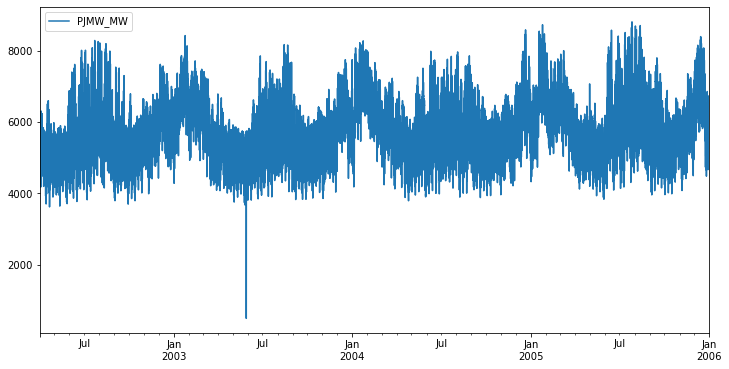

In [352]:
# Visualising data between 2002 and 2006

df.loc[(df.index<='01-01-2006')].plot(figsize=(12,6))

- Here we are visualising that at which month there is drop down of megawatts.
- So we can see that between 05 and 08 month of 2003 there is drop down.

<AxesSubplot:>

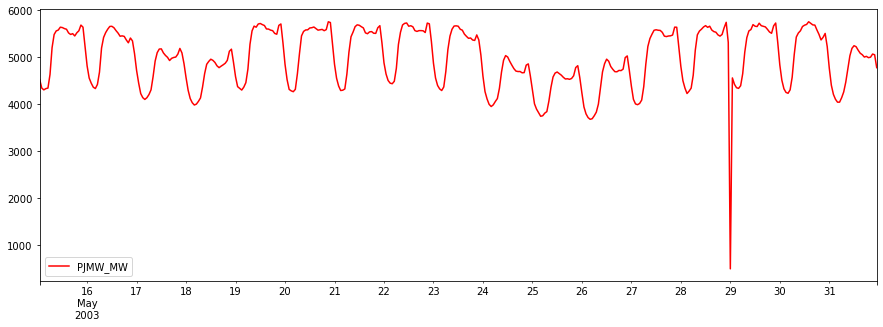

In [353]:
# Visualising at what point the and at what day the mega watt has been dropped down

df.loc[(df.index>'05-15-2003')&(df.index<'06-01-2003')].plot(figsize=(15,5),color='red')


- So here we can see that drop down is at 2003-05-29 date and it is less than thousand megawatts

<AxesSubplot:>

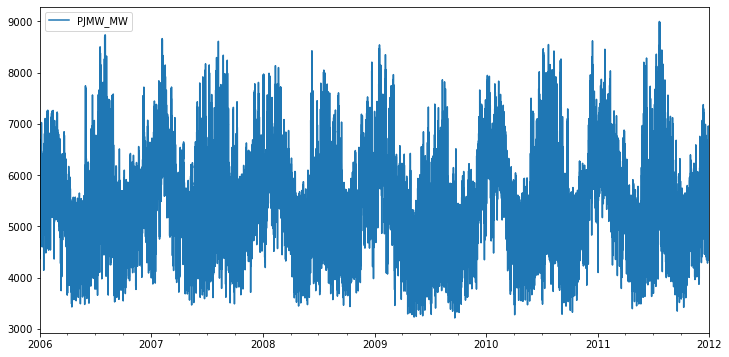

In [354]:
# Visualising data between 2006 and 2012

df.loc[(df.index>='01-01-2006')&(df.index<='01-01-2012')].plot(figsize=(12,6))

<AxesSubplot:>

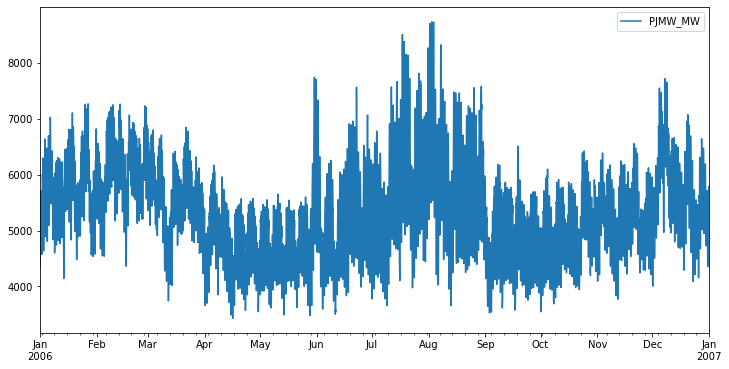

In [355]:
# Visualising data between 2012 and 2019

df.loc[(df.index>='01-01-2006')&(df.index<='01-01-2007')].plot(figsize=(12,6))

<AxesSubplot:xlabel='Datetime'>

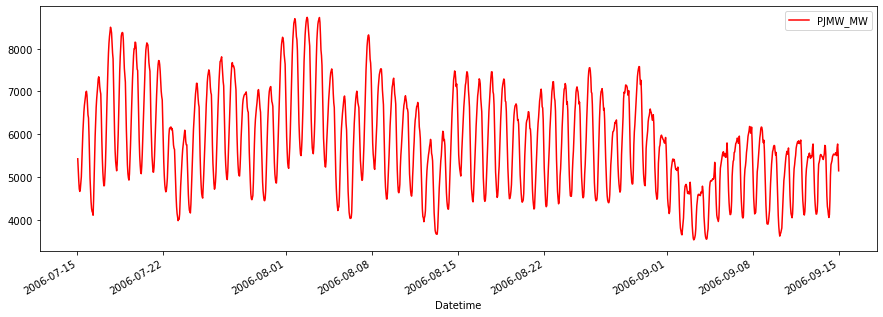

In [27]:
# Visualising at what point and at what day the mega watt has been at highest point

df.loc[(df.index>'15-07-2006')&(df.index<'15-09-2006')].plot(figsize=(15,5),color='red')

- So here we can see that in between 2006-08-01 and 2006-08-08 the values of mega watts is between 8000 to 9000.

<AxesSubplot:>

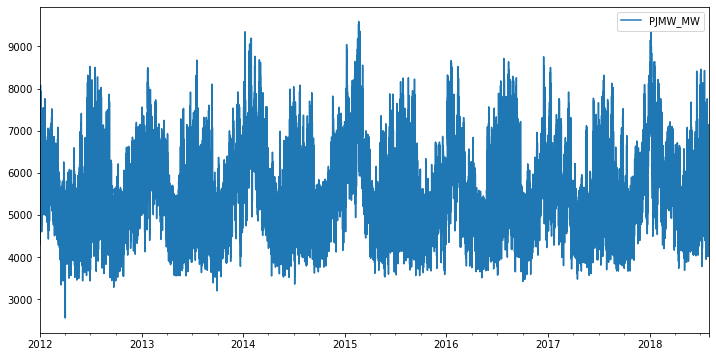

In [356]:
# Visualising data between 2012 and 2019

df.loc[(df.index>='01-01-2012')&(df.index<='01-01-2019')].plot(figsize=(12,6))

<AxesSubplot:>

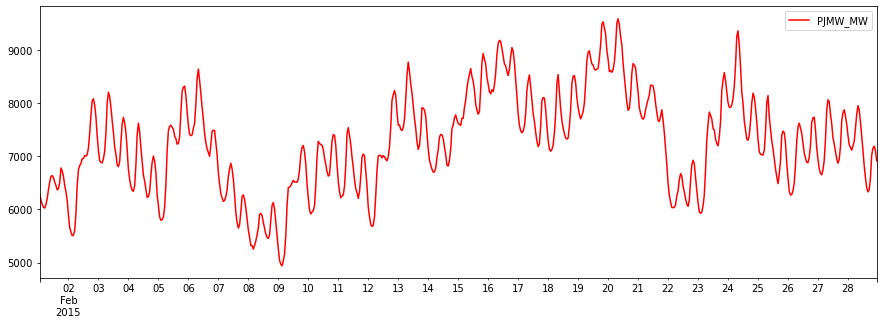

In [357]:
# Visualising at what point and at what day the mega watt has been at highest point

df.loc[(df.index>'02-01-2015')&(df.index<'03-01-2015')].plot(figsize=(15,5),color='red')

In [18]:
# Slicing out the year,month,date,hour etc, from the datetime index

def function (df):
    df['Year']=df.index.year
    df['Month']=df.index.month
    df['Date_of_month']=df.index.day
    df['Hour']=df.index.hour
    df['Quarter']=df.index.quarter
    df['Day_of_week']=df.index.dayofweek
    df['Day_of_year']=df.index.dayofyear
    return df
 
 # So here we are defining the function to sort out datetime and creating the different columns for them ,so that it will helpfull to analyse the results

In [19]:
df=function(df)
df.head()

PJMW_MW  Year  Month  Date_of_month  Hour  Quarter  \
2002-04-01 01:00:00   4374.0  2002      4              1     1        2   
2002-04-01 02:00:00   4306.0  2002      4              1     2        2   
2002-04-01 03:00:00   4322.0  2002      4              1     3        2   
2002-04-01 04:00:00   4359.0  2002      4              1     4        2   
2002-04-01 05:00:00   4436.0  2002      4              1     5        2   

                     Day_of_week  Day_of_year  
2002-04-01 01:00:00            0           91  
2002-04-01 02:00:00            0           91  
2002-04-01 03:00:00            0           91  
2002-04-01 04:00:00            0           91  
2002-04-01 05:00:00            0           91

In [360]:
# Checking the null values

df.isnull().sum()

PJMW_MW          0
Year             0
Month            0
Date_of_month    0
Hour             0
Quarter          0
Day_of_week      0
Day_of_year      0
dtype: int64

In [361]:
# Counts with respect to Hour

df['Hour'].sort_values().value_counts(sort=False)

0     5968
1     5968
2     5968
3     5968
4     5968
5     5968
6     5968
7     5968
8     5968
9     5968
10    5968
11    5968
12    5968
13    5968
14    5968
15    5968
16    5968
17    5968
18    5968
19    5968
20    5968
21    5968
22    5968
23    5968
Name: Hour, dtype: int64

In [362]:
# Counts with respect to Day_of_week

df['Day_of_week'].sort_values().value_counts(sort=False)

0    20471
1    20472
2    20472
3    20472
4    20449
5    20448
6    20448
Name: Day_of_week, dtype: int64

In [363]:
# Counts with respect to Months

df['Month'].sort_values().value_counts(sort=False)

1     11904
2     10848
3     11904
4     12239
5     12648
6     12240
7     12648
8     11953
9     11520
10    11904
11    11520
12    11904
Name: Month, dtype: int64

In [364]:
# Counts with respect to Year

df['Year'].sort_values().value_counts(sort=False)

2002    6599
2003    8760
2004    8784
2005    8760
2006    8760
2007    8760
2008    8784
2009    8760
2010    8760
2011    8760
2012    8784
2013    8760
2014    8760
2015    8760
2016    8784
2017    8760
2018    5137
Name: Year, dtype: int64

In [365]:
# Counts with respect to Date_of_month

df['Date_of_month'].sort_values().value_counts(sort=False)

1     4727
2     4728
3     4705
4     4704
5     4704
6     4704
7     4704
8     4704
9     4704
10    4704
11    4704
12    4704
13    4704
14    4704
15    4704
16    4704
17    4704
18    4704
19    4704
20    4704
21    4704
22    4704
23    4704
24    4704
25    4704
26    4704
27    4704
28    4704
29    4416
30    4320
31    2736
Name: Date_of_month, dtype: int64

In [366]:
# Counts with respect to Quarter

df['Quarter'].sort_values().value_counts(sort=False)

1    34656
2    37127
3    36121
4    35328
Name: Quarter, dtype: int64

In [20]:
# Defining a function so we have to convert Day_of_week to Weekdays means in form of Monday,Tuesday,Wednesday etc...

def f(row):
    if row['Day_of_week'] == 0:
        val = 'Sunday'
    elif row['Day_of_week'] ==1:
        val = 'Monday'
    elif row['Day_of_week'] ==2:
        val = 'Tuesday'      
    elif row['Day_of_week'] ==3:
        val = 'Wednesday'    
    elif row['Day_of_week'] ==4:
        val = 'Thursday'    
    elif row['Day_of_week'] ==5:
        val = 'Friday'    
    elif row['Day_of_week'] ==6:
        val = 'Saturday'    
    else:
        val = -1
    return val   
        

In [21]:
# Here we are creating a new column for weekdays that is based on 'Day_of_week'

df['Weekdays'] = df.apply(f, axis=1)
df.head()

PJMW_MW  Year  Month  Date_of_month  Hour  Quarter  \
2002-04-01 01:00:00   4374.0  2002      4              1     1        2   
2002-04-01 02:00:00   4306.0  2002      4              1     2        2   
2002-04-01 03:00:00   4322.0  2002      4              1     3        2   
2002-04-01 04:00:00   4359.0  2002      4              1     4        2   
2002-04-01 05:00:00   4436.0  2002      4              1     5        2   

                     Day_of_week  Day_of_year Weekdays  
2002-04-01 01:00:00            0           91   Sunday  
2002-04-01 02:00:00            0           91   Sunday  
2002-04-01 03:00:00            0           91   Sunday  
2002-04-01 04:00:00            0           91   Sunday  
2002-04-01 05:00:00            0           91   Sunday

In [22]:
# Breaking the data of 'Months' with respect to 'Season' so, we will get another column for visualising.

def fun(x):
    if x['Month'] in [12,1,2]:
        season='Winter'
    if x['Month'] in [6,7,8]:
        season='Summer'
    if x['Month'] in [3,4,5]:
        season='Spring'
    if x['Month'] in [9,10,11]:
        season='Auntum'
    return season

In [23]:
df['Season'] = df.apply(fun, axis=1)
df.head()

PJMW_MW  Year  Month  Date_of_month  Hour  Quarter  \
2002-04-01 01:00:00   4374.0  2002      4              1     1        2   
2002-04-01 02:00:00   4306.0  2002      4              1     2        2   
2002-04-01 03:00:00   4322.0  2002      4              1     3        2   
2002-04-01 04:00:00   4359.0  2002      4              1     4        2   
2002-04-01 05:00:00   4436.0  2002      4              1     5        2   

                     Day_of_week  Day_of_year Weekdays  Season  
2002-04-01 01:00:00            0           91   Sunday  Spring  
2002-04-01 02:00:00            0           91   Sunday  Spring  
2002-04-01 03:00:00            0           91   Sunday  Spring  
2002-04-01 04:00:00            0           91   Sunday  Spring  
2002-04-01 05:00:00            0           91   Sunday  Spring

In [24]:
# Breaking the data of 'Hours' with respect to 'Time' so, we will get another column for visualising.

# Night time - 22 to 3
# Morning time - 4 to 12
# Afternoon time - 12 to 17
# Evening time - 17 to 22

def ffun(x):
    if x['Hour'] in [22,23,0,1,2,3]:
        time='Night'
    elif x['Hour'] in range(4,12):
        time='Morning'
    elif x['Hour'] in range(12,17):
        time='Afternoon'
    elif x['Hour'] in range(17,22):
        time='Evening'
    else:
        time=x
    return time    

In [25]:
# Creating the another column with respect to 'Hour'

df['Time'] = df.apply(ffun, axis=1)
df.head()

PJMW_MW  Year  Month  Date_of_month  Hour  Quarter  \
2002-04-01 01:00:00   4374.0  2002      4              1     1        2   
2002-04-01 02:00:00   4306.0  2002      4              1     2        2   
2002-04-01 03:00:00   4322.0  2002      4              1     3        2   
2002-04-01 04:00:00   4359.0  2002      4              1     4        2   
2002-04-01 05:00:00   4436.0  2002      4              1     5        2   

                     Day_of_week  Day_of_year Weekdays  Season     Time  
2002-04-01 01:00:00            0           91   Sunday  Spring    Night  
2002-04-01 02:00:00            0           91   Sunday  Spring    Night  
2002-04-01 03:00:00            0           91   Sunday  Spring    Night  
2002-04-01 04:00:00            0           91   Sunday  Spring  Morning  
2002-04-01 05:00:00            0           91   Sunday  Spring  Morning

<AxesSubplot:xlabel='Time'>

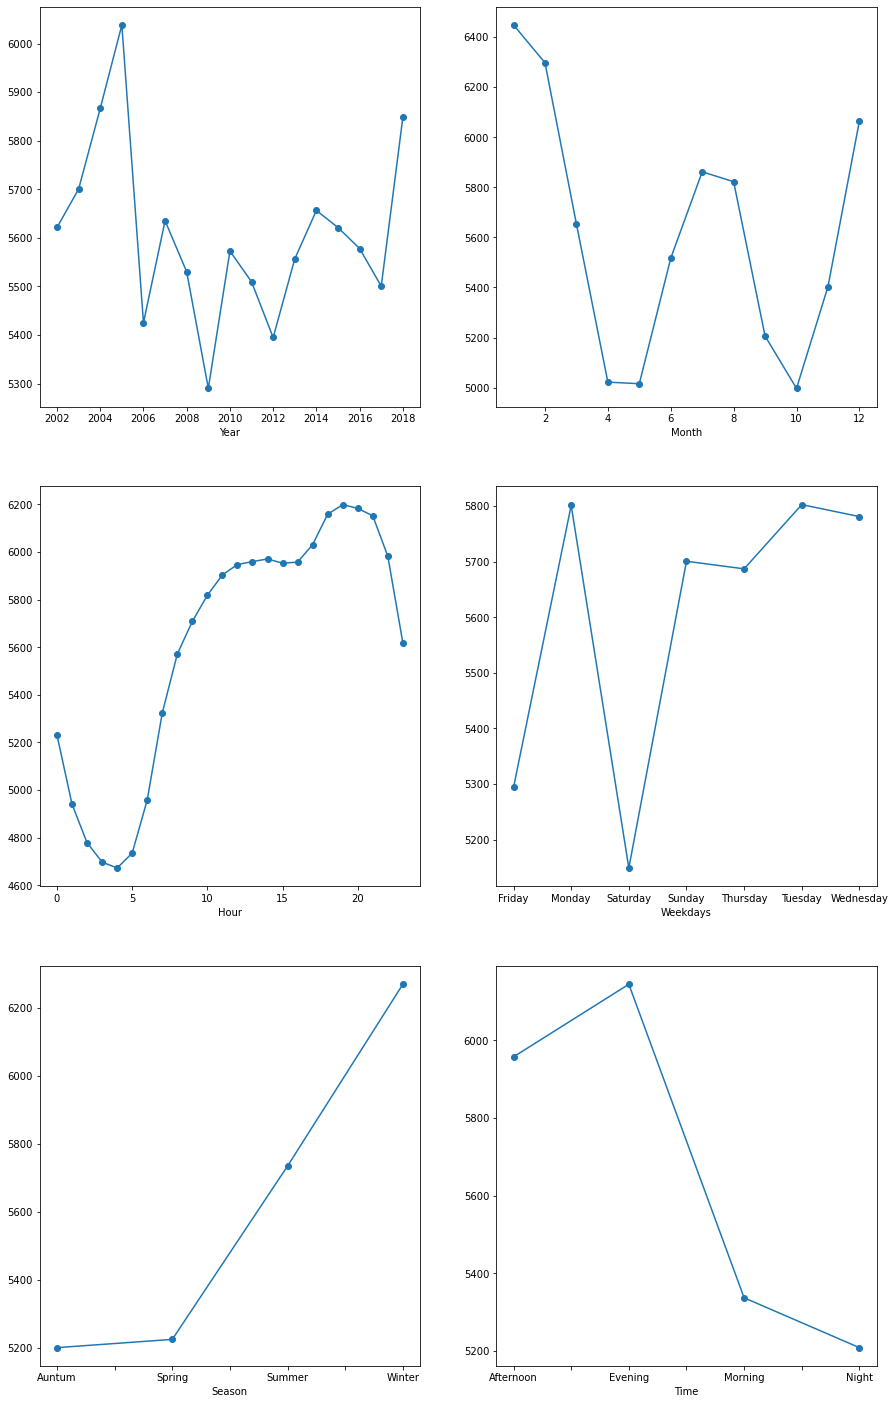

In [374]:
# Line plot with respect to 'years','months','hours','seasons','weekdays','time' and considering 'mega-watts' on y-axis
figure,axesbi=plt.subplots(3,2,figsize=(15,25))


df.groupby('Year')['PJMW_MW'].mean().plot(kind='line',marker='o',ax=axesbi[0,0])
df.groupby('Month')['PJMW_MW'].mean().plot(kind='line',marker='o',ax=axesbi[0,1])
df.groupby('Hour')['PJMW_MW'].mean().plot(kind='line',marker='o',ax=axesbi[1,0])
df.groupby('Weekdays')['PJMW_MW'].mean().plot(kind='line',marker='o',ax=axesbi[1,1])
df.groupby('Season')['PJMW_MW'].mean().plot(kind='line',marker='o',ax=axesbi[2,0])
df.groupby('Time')['PJMW_MW'].mean().plot(kind='line',marker='o',ax=axesbi[2,1])


-- Here x-axis ='Year','Month','Hour','Weekday','Season' & 'Time' we have plotted and on y-axis ='Mega_watt' data has been plotted.

-- As in case of 'Years' we can see that in 2002 the megawatts starts increasing till 2004 but after that there is sudden drop down of mega_watt,but after 2004 the mega_watt follows increasing and decreasing pattern.

-- But in the 'Month' cases in 4,5 & 10 (i.e, April,May,October) month there is sudden dropdown of mega_watt rather for other months it is increasing and decresing pattern.

-- Similarly with respect to 'Hours' at first from 0 to 5 it starts decresing and sudden follows increasing pattern but after 24 hours its starts decreasing.

-- As compared to "Weekdays" we can see that in 'Saturday' & 'Friday' the energy consumption is low but in other weekdays it is high.

-- As in case of 'Season' in 'Auntum' & 'Spring' season the energy consumption is low ,hence for remaining season is high.

-- As we can see at 'Time' the energy consumtion is high in 'Afternoon' & 'Evening' ,hence it is low in 'Morning' & 'Night' time.


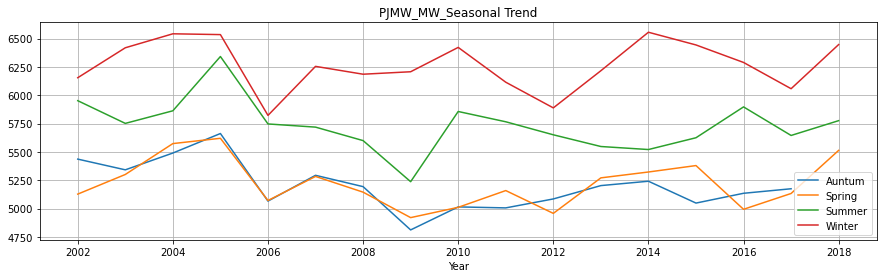

In [377]:
# Visualising the seasonal trends.

df.pivot_table(index=df['Year'], 
                     columns='Season', 
                     values='PJMW_MW',
                     aggfunc='mean').plot(figsize=(15,4),
                     title='PJMW_MW_Seasonal Trend')
plt.legend()
plt.grid()

As by seeing the graph we can see that the energy consumption is low in 'spring' & 'Auntum' season but it is high in 'winter'& 'summer' season

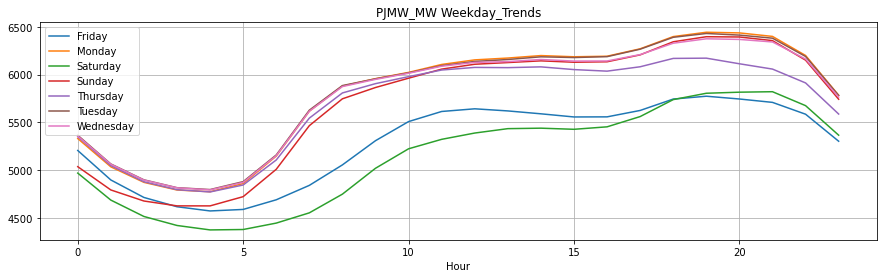

In [396]:
df.pivot_table(index=df['Hour'], 
                     columns='Weekdays', 
                     values='PJMW_MW',
                     aggfunc='mean').plot(figsize=(15,4),
                     title='PJMW_MW Weekday_Trends')
plt.legend()
plt.grid()

-- By seeing the graph we can see that the energy consumption is high in 'sunday' as compared to other days . But with respect to hours we can see that in the morning from 7 its starts increasing and after night 12 its starts decreasing.

<AxesSubplot:xlabel='Year', ylabel='PJMW_MW'>

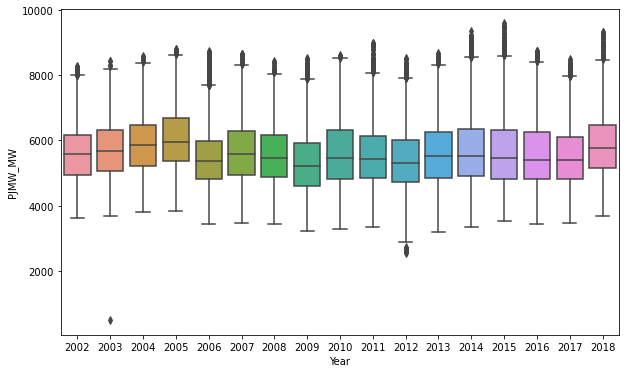

In [45]:
# Box plot with respect to years

plt.figure(figsize=(10,6))
sns.boxplot(x='Year',y='PJMW_MW',data=df)

-- So here by seeing box plot we can see that mean and standard deviation with respect to 'mega watts' is been constant.

-- Hence there is change but little bit.

-- By seeing this boxplot we can see that in '2003' the 'mega watts' has been sunddenly dropped and hence in '2015' there is sudden rise in 'mega watts' 

###  Outliers Detection

In [26]:
# Separating the years with respect to 'mega watts' to detect outliers

df_2002=df.loc[df['Year']==2002]
df_2002

df_2003=df.loc[df['Year']==2003]
df_2003

df_2004=df.loc[df['Year']==2004]
df_2004

df_2005=df.loc[df['Year']==2005]
df_2005

df_2006=df.loc[df['Year']==2006]
df_2006

df_2007=df.loc[df['Year']==2007]
df_2007

df_2008=df.loc[df['Year']==2008]
df_2008

df_2009=df.loc[df['Year']==2009]
df_2009

df_2010=df.loc[df['Year']==2010]
df_2010

df_2011=df.loc[df['Year']==2011]
df_2011

df_2012=df.loc[df['Year']==2012]
df_2012

df_2013=df.loc[df['Year']==2013]
df_2013

df_2014=df.loc[df['Year']==2014]
df_2014

df_2015=df.loc[df['Year']==2015]
df_2015

df_2016=df.loc[df['Year']==2016]
df_2016

df_2017=df.loc[df['Year']==2017]
df_2017

df_2018=df.loc[df['Year']==2018]
df_2018

PJMW_MW  Year  Month  Date_of_month  Hour  Quarter  \
2018-01-01 00:00:00   7612.0  2018      1              1     0        1   
2018-01-01 01:00:00   7469.0  2018      1              1     1        1   
2018-01-01 02:00:00   7423.0  2018      1              1     2        1   
2018-01-01 03:00:00   7380.0  2018      1              1     3        1   
2018-01-01 04:00:00   7366.0  2018      1              1     4        1   
...                      ...   ...    ...            ...   ...      ...   
2018-08-02 20:00:00   6545.0  2018      8              2    20        3   
2018-08-02 21:00:00   6496.0  2018      8              2    21        3   
2018-08-02 22:00:00   6325.0  2018      8              2    22        3   
2018-08-02 23:00:00   5892.0  2018      8              2    23        3   
2018-08-03 00:00:00   5489.0  2018      8              3     0        3   

                     Day_of_week  Day_of_year   Weekdays  Season     Time  
2018-01-01 00:00:00            0            1     Sunday  Winter    Night  
2018-01-01 01:00:00            0            1     Sunday  Winter    Night  
2018-01-01 02:00:00            0            1     Sunday  Winter    Night  
2018-01-01 03:00:00            0            1     Sunday  Winter    Night  
2018-01-01 04:00:00            0            1     Sunday  Winter  Morning  
...                          ...          ...        ...     ...      ...  
2018-08-02 20:00:00            3          214  Wednesday  Summer  Evening  
2018-08-02 21:00:00            3          214  Wednesday  Summer  Evening  
2018-08-02 22:00:00            3          214  Wednesday  Summer    Night  
2018-08-02 23:00:00            3          214  Wednesday  Summer    Night  
2018-08-03 00:00:00            4          215   Thursday  Summer    Night  

[5137 rows x 11 columns]

<AxesSubplot:xlabel='Year', ylabel='PJMW_MW'>

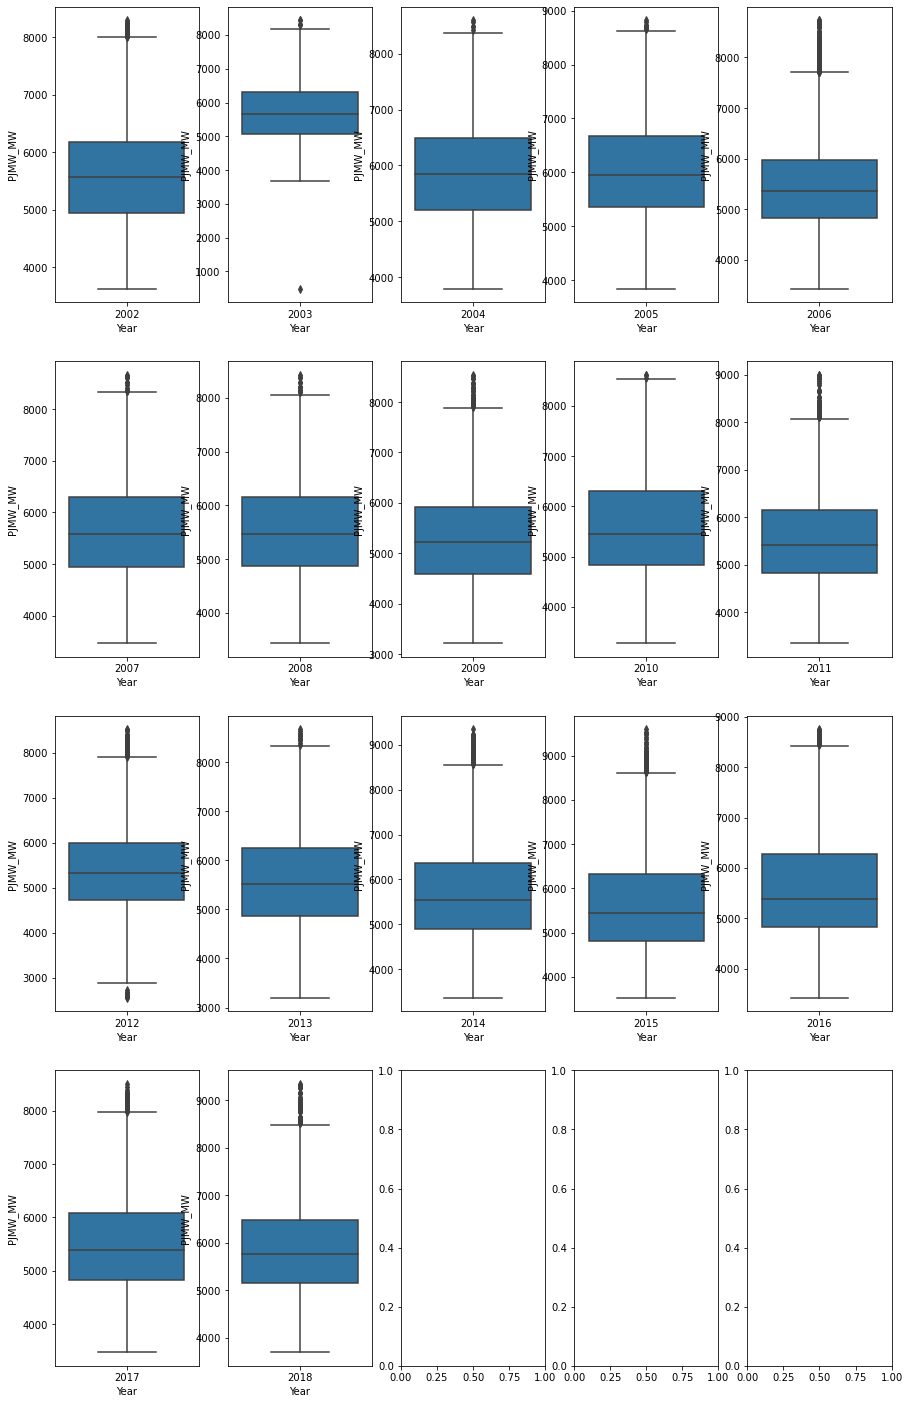

In [380]:
figure,axesbi=plt.subplots(4,5,figsize=(15,25))


sns.boxplot(x='Year',y='PJMW_MW',data=df_2002,ax=axesbi[0,0])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2003,ax=axesbi[0,1])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2004,ax=axesbi[0,2])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2005,ax=axesbi[0,3])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2006,ax=axesbi[0,4])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2007,ax=axesbi[1,0])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2008,ax=axesbi[1,1])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2009,ax=axesbi[1,2])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2010,ax=axesbi[1,3])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2011,ax=axesbi[1,4])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2012,ax=axesbi[2,0])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2013,ax=axesbi[2,1])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2014,ax=axesbi[2,2])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2015,ax=axesbi[2,3])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2016,ax=axesbi[2,4])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2017,ax=axesbi[3,0])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2018,ax=axesbi[3,1])

In [27]:
# Importing library to detect the outliers

from matplotlib.cbook import boxplot_stats  

In [28]:
# Displaying the outliers with respect to 'Years'

print("2002")
print(boxplot_stats(df_2002.PJMW_MW).pop(0)['fliers'])
print("---------------------------------------------------------------------------------")

print("2003")
print(boxplot_stats(df_2003.PJMW_MW).pop(0)['fliers'])
print("---------------------------------------------------------------------------------")

print("2004")
print(boxplot_stats(df_2004.PJMW_MW).pop(0)['fliers'])
print("---------------------------------------------------------------------------------")

print("2005")
print(boxplot_stats(df_2005.PJMW_MW).pop(0)['fliers'])
print("---------------------------------------------------------------------------------")

print("2006")
print(boxplot_stats(df_2006.PJMW_MW).pop(0)['fliers'])
print("---------------------------------------------------------------------------------")

print("2007")
print(boxplot_stats(df_2007.PJMW_MW).pop(0)['fliers'])
print("---------------------------------------------------------------------------------")

print("2008")
print(boxplot_stats(df_2008.PJMW_MW).pop(0)['fliers'])
print("---------------------------------------------------------------------------------")

print("2009")
print(boxplot_stats(df_2009.PJMW_MW).pop(0)['fliers'])
print("---------------------------------------------------------------------------------")

print("2010")
print(boxplot_stats(df_2010.PJMW_MW).pop(0)['fliers'])
print("---------------------------------------------------------------------------------")

print("2011")
print(boxplot_stats(df_2011.PJMW_MW).pop(0)['fliers'])
print("---------------------------------------------------------------------------------")

print("2012")
print(boxplot_stats(df_2012.PJMW_MW).pop(0)['fliers'])
print("---------------------------------------------------------------------------------")

print("2013")
print(boxplot_stats(df_2013.PJMW_MW).pop(0)['fliers'])
print("---------------------------------------------------------------------------------")

print("2014")
print(boxplot_stats(df_2014.PJMW_MW).pop(0)['fliers'])
print("---------------------------------------------------------------------------------")

print("2015")
print(boxplot_stats(df_2015.PJMW_MW).pop(0)['fliers'])
print("---------------------------------------------------------------------------------")

print("2016")
print(boxplot_stats(df_2016.PJMW_MW).pop(0)['fliers'])
print("---------------------------------------------------------------------------------")

print("2017")
print(boxplot_stats(df_2017.PJMW_MW).pop(0)['fliers'])
print("---------------------------------------------------------------------------------")

print("2018")
print(boxplot_stats(df_2018.PJMW_MW).pop(0)['fliers'])
print("---------------------------------------------------------------------------------")


2002
[8023. 8016. 8026. 8095. 8059. 8048. 8157. 8217. 8300. 8264. 8153. 8077.
 8252. 8256. 8227. 8258. 8270. 8126. 8086. 8113. 8009. 8107. 8160. 8226.
 8221. 8087. 8020. 8038. 8164. 8221. 8149. 8035. 8069. 8062. 8158. 8193.
 8210. 8147.]
---------------------------------------------------------------------------------
2003
[ 487. 8296. 8431. 8437. 8333.]
---------------------------------------------------------------------------------
2004
[8417. 8478. 8598. 8574. 8490.]
---------------------------------------------------------------------------------
2005
[8742. 8664. 8721. 8823. 8797. 8695. 8707. 8656. 8719.]
---------------------------------------------------------------------------------
2006
[7709. 7743. 7898. 8132. 8286. 8393. 8503. 8454. 8374. 8135. 7901. 7762.
 7816. 8075. 8297. 8360. 8380. 8368. 8212. 7887. 7840. 7999. 8001. 8154.
 8146. 8026. 7730. 7721. 7964. 8066. 8136. 8109. 8087. 7906. 7723. 7717.
 7718. 7763. 7810. 7924. 8101. 8200. 8268. 8238. 8133. 7881. 7753. 7877.
 8

In [29]:
# Using 'median' and 'mode' for filling the outliers

m1 = df_2002["PJMW_MW"] .median()
df_2002["PJMW_MW"] = np.where(df_2002["PJMW_MW"]  >7900, m1,df_2002["PJMW_MW"])


m2 = df_2003["PJMW_MW"] .median()
m00 = df_2003["PJMW_MW"] .mean()
df_2003["PJMW_MW"] = np.where(df_2003["PJMW_MW"]  >8200, m2,df_2003["PJMW_MW"])
df_2003["PJMW_MW"] = np.where(df_2003["PJMW_MW"]  <500, m00,df_2003["PJMW_MW"])


m3 = df_2004["PJMW_MW"] .median()
df_2004["PJMW_MW"] = np.where(df_2004["PJMW_MW"]  >8400, m3,df_2004["PJMW_MW"])


m4 = df_2005["PJMW_MW"] .median()
df_2005["PJMW_MW"] = np.where(df_2005["PJMW_MW"]  >8650, m4,df_2005["PJMW_MW"])


m5 = df_2006["PJMW_MW"] .median()
df_2006["PJMW_MW"] = np.where(df_2006["PJMW_MW"]  >7600, m5,df_2006["PJMW_MW"])


m6 = df_2007["PJMW_MW"] .median()
df_2007["PJMW_MW"] = np.where(df_2007["PJMW_MW"]  >8300, m6,df_2007["PJMW_MW"])


m7 = df_2008["PJMW_MW"] .median()
df_2008["PJMW_MW"] = np.where(df_2008["PJMW_MW"]  >8000, m7,df_2008["PJMW_MW"])


m8 = df_2009["PJMW_MW"] .median()
df_2009["PJMW_MW"] = np.where(df_2009["PJMW_MW"]  >7800, m8,df_2009["PJMW_MW"])


m9 = df_2010["PJMW_MW"] .median()
df_2010["PJMW_MW"] = np.where(df_2010["PJMW_MW"]  >8500, m9,df_2010["PJMW_MW"])


m10 = df_2011["PJMW_MW"] .median()
df_2011["PJMW_MW"] = np.where(df_2011["PJMW_MW"]  >8000, m10,df_2011["PJMW_MW"])


m11 = df_2012["PJMW_MW"] .median()
m0 =  df_2012["PJMW_MW"] .mean()
df_2012["PJMW_MW"] = np.where(df_2012["PJMW_MW"]  >7800, m11,df_2012["PJMW_MW"])
df_2012["PJMW_MW"] = np.where(df_2012["PJMW_MW"]  <3000, m0,df_2012["PJMW_MW"])


m12 = df_2013["PJMW_MW"] .median()
df_2013["PJMW_MW"] = np.where(df_2013["PJMW_MW"]  >8300, m12,df_2013["PJMW_MW"])


m13 = df_2014["PJMW_MW"] .median()
df_2014["PJMW_MW"] = np.where(df_2014["PJMW_MW"]  >8400, m13,df_2014["PJMW_MW"])


m14 = df_2015["PJMW_MW"] .median()
df_2015["PJMW_MW"] = np.where(df_2015["PJMW_MW"]  >8500, m14,df_2015["PJMW_MW"])


m15 = df_2016["PJMW_MW"] .median()
df_2016["PJMW_MW"] = np.where(df_2016["PJMW_MW"]  >8400, m15,df_2016["PJMW_MW"])


m16 = df_2017["PJMW_MW"] .median()
df_2017["PJMW_MW"] = np.where(df_2017["PJMW_MW"]  >7900, m16,df_2017["PJMW_MW"])


m17 = df_2018["PJMW_MW"] .median()
df_2018["PJMW_MW"] = np.where(df_2018["PJMW_MW"]  >8300, m17,df_2018["PJMW_MW"])

<AxesSubplot:xlabel='Year', ylabel='PJMW_MW'>

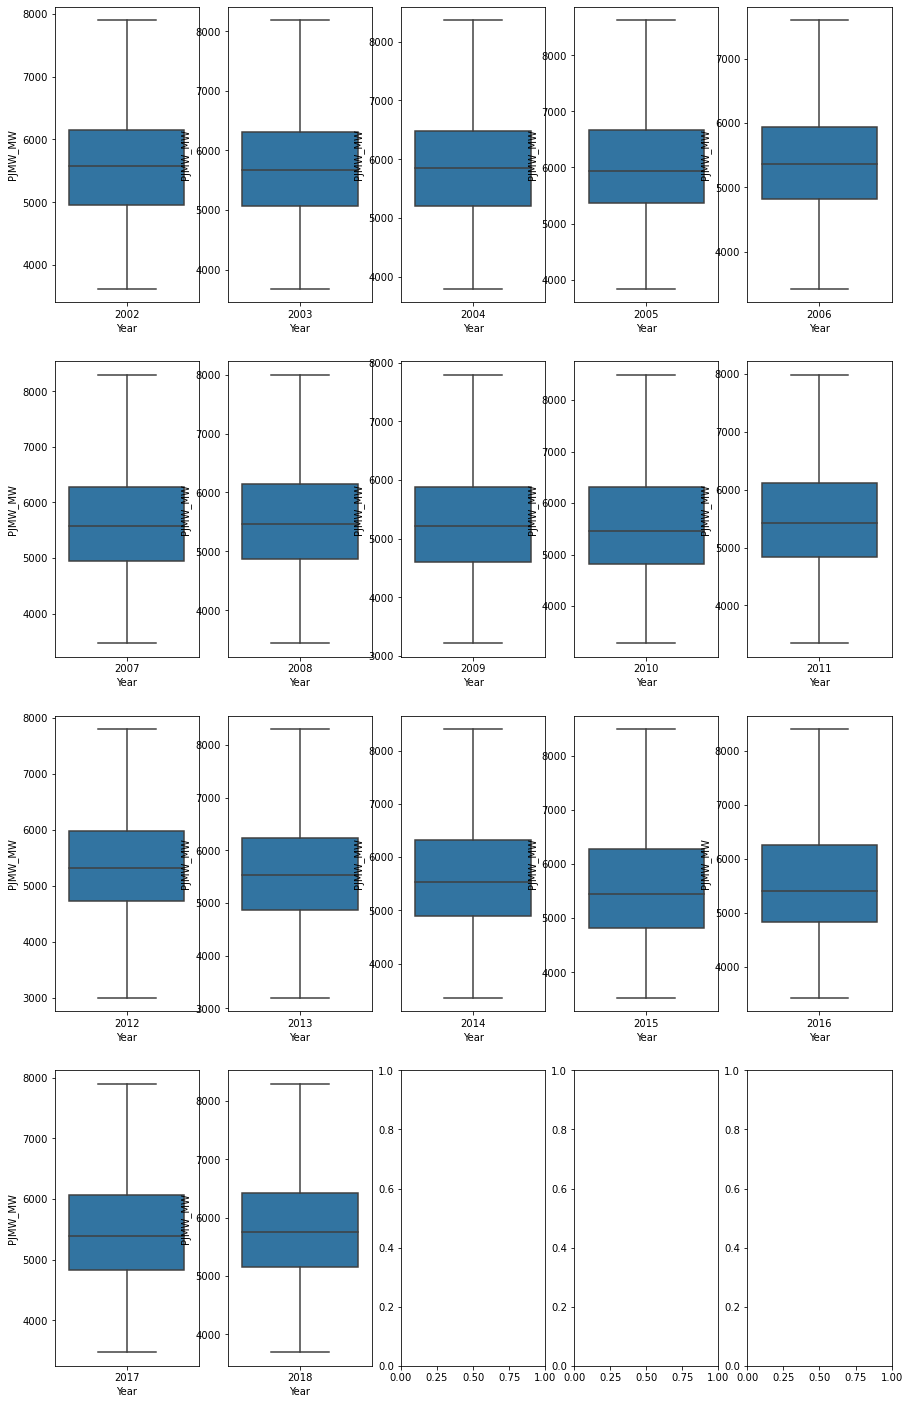

In [384]:
figure,axesbi=plt.subplots(4,5,figsize=(15,25))


sns.boxplot(x='Year',y='PJMW_MW',data=df_2002,ax=axesbi[0,0])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2003,ax=axesbi[0,1])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2004,ax=axesbi[0,2])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2005,ax=axesbi[0,3])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2006,ax=axesbi[0,4])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2007,ax=axesbi[1,0])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2008,ax=axesbi[1,1])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2009,ax=axesbi[1,2])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2010,ax=axesbi[1,3])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2011,ax=axesbi[1,4])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2012,ax=axesbi[2,0])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2013,ax=axesbi[2,1])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2014,ax=axesbi[2,2])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2015,ax=axesbi[2,3])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2016,ax=axesbi[2,4])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2017,ax=axesbi[3,0])
sns.boxplot(x='Year',y='PJMW_MW',data=df_2018,ax=axesbi[3,1])

Hence the outliers are treated by taking the median with respect to particular years.

In [30]:
# Merging the new dataset 

dff=pd.concat([df_2002,df_2003,df_2004,df_2005,df_2006,df_2007,df_2008,df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,
              df_2015,df_2016,df_2017,df_2018])
dff.head()

PJMW_MW  Year  Month  Date_of_month  Hour  Quarter  \
2002-04-01 01:00:00   4374.0  2002      4              1     1        2   
2002-04-01 02:00:00   4306.0  2002      4              1     2        2   
2002-04-01 03:00:00   4322.0  2002      4              1     3        2   
2002-04-01 04:00:00   4359.0  2002      4              1     4        2   
2002-04-01 05:00:00   4436.0  2002      4              1     5        2   

                     Day_of_week  Day_of_year Weekdays  Season     Time  
2002-04-01 01:00:00            0           91   Sunday  Spring    Night  
2002-04-01 02:00:00            0           91   Sunday  Spring    Night  
2002-04-01 03:00:00            0           91   Sunday  Spring    Night  
2002-04-01 04:00:00            0           91   Sunday  Spring  Morning  
2002-04-01 05:00:00            0           91   Sunday  Spring  Morning

<AxesSubplot:xlabel='Year', ylabel='PJMW_MW'>

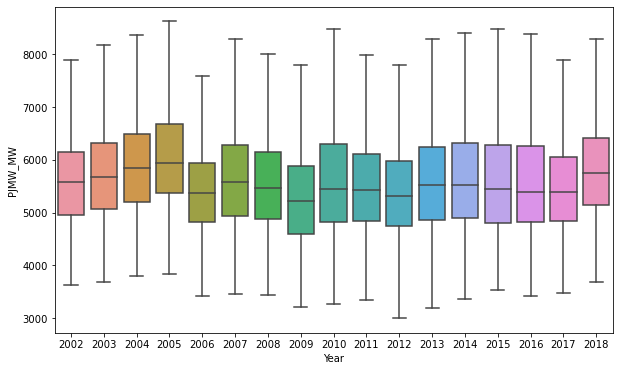

In [387]:
# Box plot with respect to years

plt.figure(figsize=(10,6))
sns.boxplot(x='Year',y='PJMW_MW',data=dff)

In [388]:
# Bar plot which shows the mean with respect to megawatts
# Pie plot shows the percentage of mean with respect to megawatts

figure,axesbi=plt.subplots(4,2,figsize=(15,25))
df.groupby('Year')['PJMW_MW'].mean().plot(kind='barh',ax=axesbi[0,0])
df.groupby('Year')['PJMW_MW'].mean().plot(kind='pie', autopct='%.0f%%',explode=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,
                                                                               0.02,0.02,0.02,0.02,0.02],ax=axesbi[0,1])
df.groupby('Time')['PJMW_MW'].mean().plot(kind='bar',ax=axesbi[1,0])
df.groupby('Time')['PJMW_MW'].mean().plot(kind='pie', autopct='%.0f%%',explode=[0.02,0.02,0.02,0.02],ax=axesbi[1,1])
df.groupby('Weekdays')['PJMW_MW'].mean().plot(kind='barh',ax=axesbi[2,0])
df.groupby('Weekdays')['PJMW_MW'].mean().plot(kind='pie', autopct='%.0f%%',explode=[0.02,0.02,0.02,0.02,0.02,0.02,0.02],ax=axesbi[2,1])
df.groupby('Season')['PJMW_MW'].mean().plot(kind='bar',ax=axesbi[3,0])
df.groupby('Season')['PJMW_MW'].mean().plot(kind='pie', autopct='%.0f%%',explode=[0.02,0.02,0.02,0.02],ax=axesbi[3,1])


<AxesSubplot:ylabel='PJMW_MW'>


-- Hence with the bar and pie plots we can see the respected mean of 'mega watts with respect to 'years','time','weekdays'& 'season'.

-- In 'season' we can see the percentage of mega watts with respect to mean in 'spring' & 'auntum' season is low but in 'winter' & 'summer' season is high .

-- In 'weekdays' we can see the percentage of mega watts with respect to mean in 'saturday' & 'friday'  is low but in 'monday','wednesday','tuesday','sunday' & 'thursday' is high .

-- In 'time' we can see the percentage of mega watts with respect to mean in 'night' is low but in 'morning','afternoon' & 'evening' is high .

-- In 'year' we can see the percentage of mega watts with respect to mean almost is same.


<AxesSubplot:ylabel='PJMW_MW'>

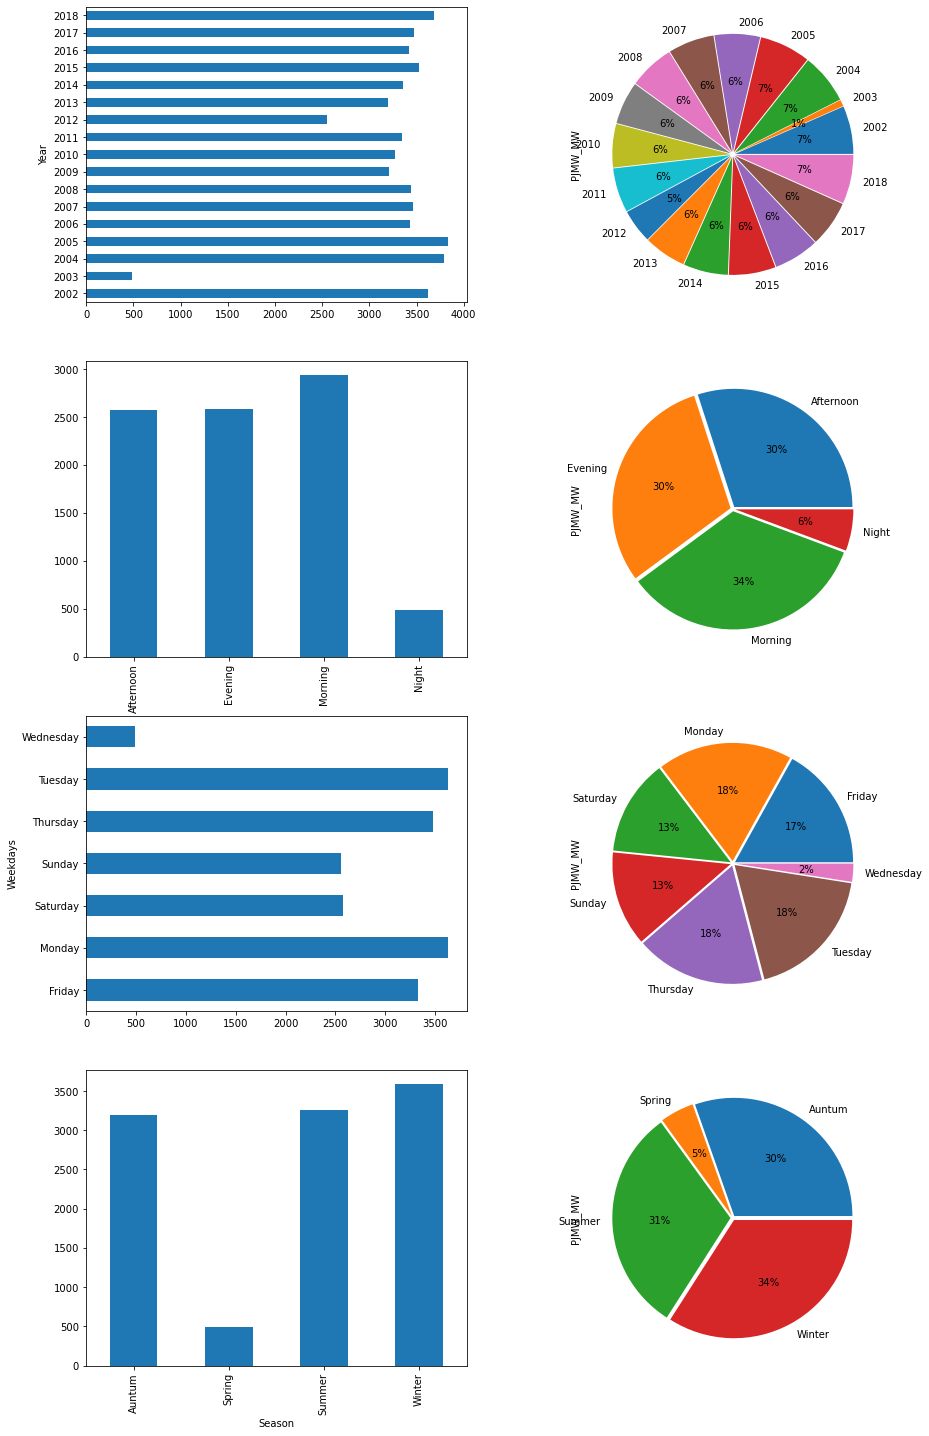

In [389]:
# Bar plot which shows the minimum values with respect to megawatts
# Pie plot shows the percentage of minimum values with respect to megawatts

figure,axesbi=plt.subplots(4,2,figsize=(15,25))
df.groupby('Year')['PJMW_MW'].min().plot(kind='barh',ax=axesbi[0,0])
df.groupby('Year')['PJMW_MW'].min().plot(kind='pie', autopct='%.0f%%',explode=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,
                                                                               0.02,0.02,0.02,0.02,0.02],ax=axesbi[0,1])
df.groupby('Time')['PJMW_MW'].min().plot(kind='bar',ax=axesbi[1,0])
df.groupby('Time')['PJMW_MW'].min().plot(kind='pie', autopct='%.0f%%',explode=[0.02,0.02,0.02,0.02],ax=axesbi[1,1])
df.groupby('Weekdays')['PJMW_MW'].min().plot(kind='barh',ax=axesbi[2,0])
df.groupby('Weekdays')['PJMW_MW'].min().plot(kind='pie', autopct='%.0f%%',explode=[0.02,0.02,0.02,0.02,0.02,0.02,0.02],ax=axesbi[2,1])
df.groupby('Season')['PJMW_MW'].min().plot(kind='bar',ax=axesbi[3,0])
df.groupby('Season')['PJMW_MW'].min().plot(kind='pie', autopct='%.0f%%',explode=[0.02,0.02,0.02,0.02],ax=axesbi[3,1])



-- Hence with the bar and pie plots we can see the respected minimum values of 'mega watts with respect to 'years','time','weekdays'& 'season'.

-- In 'season' we can see the percentage of mega watts with respect to  minimum values in 'spring' season is low but in 'winter','auntum' & 'summer' season is high .

-- In 'weekdays' we can see the percentage of mega watts with respect to minimum values in 'wednesday' is low but in 'monday','wednesday','tuesday','sunday','saturday','friday'& 'thursday' is high .

-- In 'time' we can see the percentage of mega watts with respect to minimum values in 'night' is low but in 'morning','afternoon' & 'evening' is high .

-- In 'year' we can see the percentage of mega watts with respect to minimum values in '2003' is low but in remaining years it is almost same.


In [390]:
# Bar plot which shows the maximum values with respect to megawatts
# Pie plot shows the percentage of maximum values with respect to megawatts

figure,axesbi=plt.subplots(4,2,figsize=(15,25))
df.groupby('Year')['PJMW_MW'].max().plot(kind='barh',ax=axesbi[0,0])
df.groupby('Year')['PJMW_MW'].max().plot(kind='pie', autopct='%.0f%%',explode=[0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,
                                                                               0.02,0.02,0.02,0.02,0.02],ax=axesbi[0,1])
df.groupby('Time')['PJMW_MW'].max().plot(kind='bar',ax=axesbi[1,0])
df.groupby('Time')['PJMW_MW'].max().plot(kind='pie', autopct='%.0f%%',explode=[0.02,0.02,0.02,0.02],ax=axesbi[1,1])
df.groupby('Weekdays')['PJMW_MW'].max().plot(kind='barh',ax=axesbi[2,0])
df.groupby('Weekdays')['PJMW_MW'].max().plot(kind='pie', autopct='%.0f%%',explode=[0.02,0.02,0.02,0.02,0.02,0.02,0.02],ax=axesbi[2,1])
df.groupby('Season')['PJMW_MW'].max().plot(kind='bar',ax=axesbi[3,0])
df.groupby('Season')['PJMW_MW'].max().plot(kind='pie', autopct='%.0f%%',explode=[0.02,0.02,0.02,0.02],ax=axesbi[3,1])


<AxesSubplot:ylabel='PJMW_MW'>


-- Hence with the bar and pie plots we can see the respected maximum values of 'mega watts with respect to 'years','time','weekdays'& 'season'.

-- In 'season' we can see the percentage of mega watts with respect to  maximum values in 'winter' & 'summer' season is high but in 'auntum' & 'spring' season is low .

-- In 'weekdays' we can see the percentage of mega watts with respect to maximum values in 'monday','wednesday','tuesday','sunday','saturday'&'friday' is high but in 'wednesday' & 'thursday' is low .

-- In 'time' we can see the percentage of mega watts with respect to maximum values in 'night','morning','evening' is high  but in'afternoon'is low .

-- In 'year' we can see the percentage of mega watts with respect to maximum values in years it is almost same.


In [31]:
# Outliers treated data

dff.head()

PJMW_MW  Year  Month  Date_of_month  Hour  Quarter  \
2002-04-01 01:00:00   4374.0  2002      4              1     1        2   
2002-04-01 02:00:00   4306.0  2002      4              1     2        2   
2002-04-01 03:00:00   4322.0  2002      4              1     3        2   
2002-04-01 04:00:00   4359.0  2002      4              1     4        2   
2002-04-01 05:00:00   4436.0  2002      4              1     5        2   

                     Day_of_week  Day_of_year Weekdays  Season     Time  
2002-04-01 01:00:00            0           91   Sunday  Spring    Night  
2002-04-01 02:00:00            0           91   Sunday  Spring    Night  
2002-04-01 03:00:00            0           91   Sunday  Spring    Night  
2002-04-01 04:00:00            0           91   Sunday  Spring  Morning  
2002-04-01 05:00:00            0           91   Sunday  Spring  Morning

In [539]:
# Saving to csv

# dff.to_csv('Data_features.csv')

In [392]:
from statsmodels.tsa.stattools import adfuller

### Stationary Test

### Augmented Dicky Fuller Test

Null Hypothesis (H0): The series is not stationary

p-val > 0.05

Alternate Hypothesis (H1): The series is stationary

p-val <= 0.05

In [393]:
# On outlier treted data

def adfuller_test(PJMW_MW):
    result = adfuller(PJMW_MW)
    labels = ['ADF test statistics', 'P-value', '#Lags used', 'Number of observation used','Critical Values']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary. ')
        
        
adfuller_test(dff['PJMW_MW'])

ADF test statistics : -19.665512945912884
P-value : 0.0
#Lags used : 74
Number of observation used : 143157
Critical Values : {'1%': -3.4303956800384174, '5%': -2.861560189928386, '10%': -2.5667807463806995}
Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary


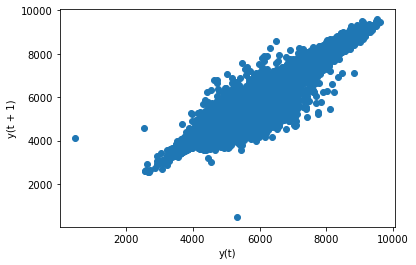

In [31]:
from pandas.plotting import lag_plot

lag_plot(df.PJMW_MW)
plt.show()

As data is moving on the upward direction so here we can say that there is positive correlation between the data points.

### On Outlier Data Seasonal

In [32]:
Ann=dff.copy()
Ann

PJMW_MW  Year  Month  Date_of_month  Hour  Quarter  \
2002-04-01 01:00:00   4374.0  2002      4              1     1        2   
2002-04-01 02:00:00   4306.0  2002      4              1     2        2   
2002-04-01 03:00:00   4322.0  2002      4              1     3        2   
2002-04-01 04:00:00   4359.0  2002      4              1     4        2   
2002-04-01 05:00:00   4436.0  2002      4              1     5        2   
...                      ...   ...    ...            ...   ...      ...   
2018-08-02 20:00:00   6545.0  2018      8              2    20        3   
2018-08-02 21:00:00   6496.0  2018      8              2    21        3   
2018-08-02 22:00:00   6325.0  2018      8              2    22        3   
2018-08-02 23:00:00   5892.0  2018      8              2    23        3   
2018-08-03 00:00:00   5489.0  2018      8              3     0        3   

                     Day_of_week  Day_of_year   Weekdays  Season     Time  
2002-04-01 01:00:00            0           91     Sunday  Spring    Night  
2002-04-01 02:00:00            0           91     Sunday  Spring    Night  
2002-04-01 03:00:00            0           91     Sunday  Spring    Night  
2002-04-01 04:00:00            0           91     Sunday  Spring  Morning  
2002-04-01 05:00:00            0           91     Sunday  Spring  Morning  
...                          ...          ...        ...     ...      ...  
2018-08-02 20:00:00            3          214  Wednesday  Summer  Evening  
2018-08-02 21:00:00            3          214  Wednesday  Summer  Evening  
2018-08-02 22:00:00            3          214  Wednesday  Summer    Night  
2018-08-02 23:00:00            3          214  Wednesday  Summer    Night  
2018-08-03 00:00:00            4          215   Thursday  Summer    Night  

[143232 rows x 11 columns]

In [33]:
Ann=Ann.loc[:,['PJMW_MW']]
Ann

PJMW_MW
2002-04-01 01:00:00   4374.0
2002-04-01 02:00:00   4306.0
2002-04-01 03:00:00   4322.0
2002-04-01 04:00:00   4359.0
2002-04-01 05:00:00   4436.0
...                      ...
2018-08-02 20:00:00   6545.0
2018-08-02 21:00:00   6496.0
2018-08-02 22:00:00   6325.0
2018-08-02 23:00:00   5892.0
2018-08-03 00:00:00   5489.0

[143232 rows x 1 columns]

In [399]:
Ann.isnull().sum()

PJMW_MW    0
dtype: int64

## Resampling 

### Yearly

In [400]:
Ann_yearly=Ann.resample('Y').mean()
Ann_yearly

PJMW_MW
2002-12-31  5595.753372
2003-12-31  5699.662420
2004-12-31  5864.776696
2005-12-31  6035.289897
2006-12-31  5390.963927
2007-12-31  5628.243322
2008-12-31  5524.139287
2009-12-31  5272.095491
2010-12-31  5571.107763
2011-12-31  5487.938699
2012-12-31  5375.215229
2013-12-31  5551.605936
2014-12-31  5624.240297
2015-12-31  5587.496005
2016-12-31  5566.014857
2017-12-31  5477.106450
2018-12-31  5793.561904

### Monthly

In [402]:
Ann_monthly=Ann.resample('M').mean().dropna()
Ann_monthly

PJMW_MW
2002-04-30  5170.892211
2002-05-31  5085.094086
2002-06-30  5675.656944
2002-07-31  5987.291667
2002-08-31  5957.370968
...                 ...
2018-04-30  5281.277778
2018-05-31  5278.620968
2018-06-30  5541.215278
2018-07-31  5946.852151
2018-08-31  5874.346939

[197 rows x 1 columns]

In [543]:
# Saving file to csv

# Ann_monthly.to_csv('Monthly_data.csv')

### Daily

In [34]:
Ann_daily=Ann.resample('d').mean().dropna()
Ann_daily

PJMW_MW
2002-04-01  5271.173913
2002-04-02  5310.416667
2002-04-03  5325.916667
2002-04-04  5670.791667
2002-04-05  5686.125000
...                 ...
2018-07-30  5492.708333
2018-07-31  5660.750000
2018-08-01  5959.708333
2018-08-02  5805.041667
2018-08-03  5489.000000

[5969 rows x 1 columns]

In [403]:
Ann_daily.max(),Ann_daily.min()

(PJMW_MW    7847.416667
 dtype: float64,
 PJMW_MW    3824.208333
 dtype: float64)

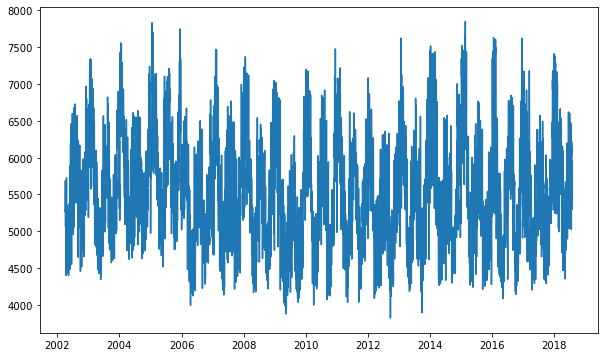

In [42]:
plt.figure(figsize=(10,6))
plt.plot(Ann_daily)

### Hourly

In [404]:
Ann_hourly=Ann.resample('H').mean().dropna()
Ann_hourly

PJMW_MW
2002-04-01 01:00:00   4374.0
2002-04-01 02:00:00   4306.0
2002-04-01 03:00:00   4322.0
2002-04-01 04:00:00   4359.0
2002-04-01 05:00:00   4436.0
...                      ...
2018-08-02 20:00:00   6545.0
2018-08-02 21:00:00   6496.0
2018-08-02 22:00:00   6325.0
2018-08-02 23:00:00   5892.0
2018-08-03 00:00:00   5489.0

[143232 rows x 1 columns]

In [542]:
# Saving the csv file

# Ann_hourly.to_csv('Hourly_data.csv')

### Seasonaly

In [405]:
Ann_seasonal=dff.groupby('Season')[['PJMW_MW']].mean()
Ann_seasonal

PJMW_MW
Season             
Auntum  5199.803156
Spring  5224.027259
Summer  5704.820906
Winter  6232.082857

### Yearly

In [428]:
def adfuller_test(PJMW_MW):
    result = adfuller(PJMW_MW)
    labels = ['ADF test statistics', 'P-value', '#Lags used', 'Number of observation used','Critical Values']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary. ')
        
        
adfuller_test(Ann_yearly)

ADF test statistics : -1.8957728473839348
P-value : 0.33405230241452866
#Lags used : 5
Number of observation used : 11
Critical Values : {'1%': -4.223238279489106, '5%': -3.189368925619835, '10%': -2.729839421487603}
Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary. 


### Monthly

In [429]:
def adfuller_test(PJMW_MW):
    result = adfuller(PJMW_MW)
    labels = ['ADF test statistics', 'P-value', '#Lags used', 'Number of observation used','Critical Values']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary. ')
        
        
adfuller_test(Ann_monthly)

ADF test statistics : -2.928869004233176
P-value : 0.042092448048637425
#Lags used : 14
Number of observation used : 182
Critical Values : {'1%': -3.4668001583460613, '5%': -2.8775552336674317, '10%': -2.5753075498128246}
Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary


### Daily

In [32]:
def adfuller_test(PJMW_MW):
    result = adfuller(PJMW_MW)
    labels = ['ADF test statistics', 'P-value', '#Lags used', 'Number of observation used','Critical Values']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary. ')
        
        
adfuller_test(Ann_daily)

ADF test statistics : -7.167923291974095
P-value : 2.854115649439333e-10
#Lags used : 33
Number of observation used : 5935
Critical Values : {'1%': -3.43145229664056, '5%': -2.8620271128107553, '10%': -2.56702928783387}
Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary


### Hourly

In [431]:
def adfuller_test(PJMW_MW):
    result = adfuller(PJMW_MW)
    labels = ['ADF test statistics', 'P-value', '#Lags used', 'Number of observation used','Critical Values']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary. ')
        
        
adfuller_test(Ann_hourly)

ADF test statistics : -19.6104780068271
P-value : 0.0
#Lags used : 73
Number of observation used : 143128
Critical Values : {'1%': -3.430395689294083, '5%': -2.861560194019227, '10%': -2.5667807485581142}
Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary


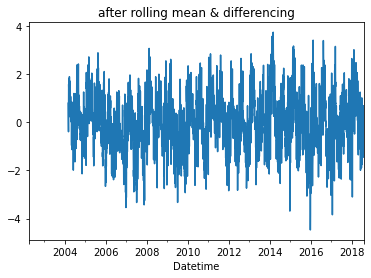

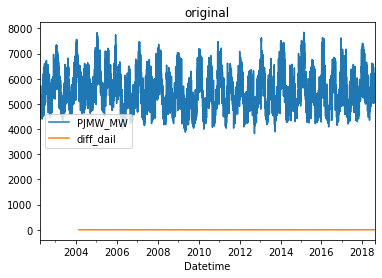

In [152]:
rolling_mean = Ann_daily['PJMW_MW'].rolling(window =700).mean()
Ann_daily['diff_dail'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
Ann_daily['diff_dail'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
Ann_daily.plot(title='original');

In [153]:
def adfuller_test(PJMW_MW):
    result = adfuller(PJMW_MW)
    labels = ['ADF test statistics', 'P-value', '#Lags used', 'Number of observation used','Critical Values']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary. ')
        
        
adfuller_test(Ann_daily['diff_dail'].dropna())

ADF test statistics : -7.909911856053958
P-value : 3.973510943853697e-12
#Lags used : 19
Number of observation used : 5249
Critical Values : {'1%': -3.4315964280482922, '5%': -2.862090792166715, '10%': -2.5670631863496958}
Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary


-- The more negative this statistic, the more likely we are to reject the null hypothesis (we have a stationary dataset).

In [35]:
dff

PJMW_MW  Year  Month  Date_of_month  Hour  Quarter  \
Datetime                                                                  
2002-12-31 01:00:00   5077.0  2002     12             31     1        4   
2002-12-31 02:00:00   4939.0  2002     12             31     2        4   
2002-12-31 03:00:00   4885.0  2002     12             31     3        4   
2002-12-31 04:00:00   4857.0  2002     12             31     4        4   
2002-12-31 05:00:00   4930.0  2002     12             31     5        4   
...                      ...   ...    ...            ...   ...      ...   
2018-01-01 20:00:00   5757.0  2018      1              1    20        1   
2018-01-01 21:00:00   5757.0  2018      1              1    21        1   
2018-01-01 22:00:00   8238.0  2018      1              1    22        1   
2018-01-01 23:00:00   7958.0  2018      1              1    23        1   
2018-01-02 00:00:00   7691.0  2018      1              2     0        1   

                     Day_of_week  Day_of_year Weekdays  Season     Time  
Datetime                                                                 
2002-12-31 01:00:00            1          365   Monday  Winter    Night  
2002-12-31 02:00:00            1          365   Monday  Winter    Night  
2002-12-31 03:00:00            1          365   Monday  Winter    Night  
2002-12-31 04:00:00            1          365   Monday  Winter  Morning  
2002-12-31 05:00:00            1          365   Monday  Winter  Morning  
...                          ...          ...      ...     ...      ...  
2018-01-01 20:00:00            0            1   Sunday  Winter  Evening  
2018-01-01 21:00:00            0            1   Sunday  Winter  Evening  
2018-01-01 22:00:00            0            1   Sunday  Winter    Night  
2018-01-01 23:00:00            0            1   Sunday  Winter    Night  
2018-01-02 00:00:00            1            2   Monday  Winter    Night  

[143206 rows x 11 columns]

In [30]:
print(Ann_daily['PJMW_MW'].shape)
print('--------------')
train_d=Ann_daily['PJMW_MW'].iloc[:-700]
test_d=Ann_daily['PJMW_MW'].iloc[-700:]
print('--------------')
print(train_d.shape,test_d.shape)

(5969,)
--------------
--------------
(5269,) (700,)


In [535]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_predict

import warnings
warnings.filterwarnings('ignore')

In [49]:
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [97]:
mod.resid.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

In [ ]:
############## Second Model ###################

In [406]:
Bnn_daily=Ann_daily.copy()
Bnn_daily

PJMW_MW
Datetime               
2002-04-01  5271.173913
2002-04-02  5310.416667
2002-04-03  5325.916667
2002-04-04  5670.791667
2002-04-05  5686.125000
...                 ...
2018-07-30  5492.708333
2018-07-31  5660.750000
2018-08-01  5959.708333
2018-08-02  5805.041667
2018-08-03  5489.000000

[5969 rows x 1 columns]

In [407]:
Bnn_daily=Bnn_daily.loc[:,['PJMW_MW']]
Bnn_daily

PJMW_MW
Datetime               
2002-04-01  5271.173913
2002-04-02  5310.416667
2002-04-03  5325.916667
2002-04-04  5670.791667
2002-04-05  5686.125000
...                 ...
2018-07-30  5492.708333
2018-07-31  5660.750000
2018-08-01  5959.708333
2018-08-02  5805.041667
2018-08-03  5489.000000

[5969 rows x 1 columns]

In [ ]:
###############################################################################################################################
###############################################################################################################################
###############################################################################################################################
###############################################################################################################################

In [408]:
# Hence importing some of the libraries to perform different models

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [409]:
# Hence splitting the data in Train and Test

TTrain = Bnn_daily.head(6000)
TTest =Bnn_daily.tail(700)

In [410]:
# Creating a function to calculate the MAPE value for test data 

def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [411]:
# Simple Exponential Method

ses_model = SimpleExpSmoothing(TTrain["PJMW_MW"]).fit()
pred_ses = ses_model.predict(start = TTest.index[0],end = TTest.index[-1])

# Mape value
mape_Sim=MAPE(pred_ses,TTest.PJMW_MW)
print(mape_Sim)

# RMSE
rmse_sim=np.sqrt(mean_squared_error(pred_ses,TTest.PJMW_MW))
print(rmse_sim)

5.415138950151535
391.63404677057184


In [412]:
# Holt method 

hw_model = Holt(TTrain["PJMW_MW"]).fit()
pred_hw = hw_model.predict(start = TTest.index[0],end = TTest.index[-1])

# Mape value
mape_Holt=MAPE(pred_hw,TTest.PJMW_MW) 
print(mape_Holt)

# RMSE
rmse_holt=np.sqrt(mean_squared_error(pred_hw,TTest.PJMW_MW))
print(rmse_holt)

5.4715911508623085
392.5041557826128


In [413]:
# Holts winter exponential smoothing with additive seasonality and additive trend

hwe_model_add_add = ExponentialSmoothing(TTrain["PJMW_MW"],seasonal="add",trend="add",seasonal_periods=4,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = TTest.index[0],end = TTest.index[-1])

# Mape value
mape_holt_win_add=MAPE(pred_hwe_add_add,TTest.PJMW_MW)
print(mape_holt_win_add)

# RMSE
rmse_holt_win_add=np.sqrt(mean_squared_error(pred_hwe_add_add,TTest.PJMW_MW))
print(rmse_holt_win_add)

5.427764368971462
392.8663934149694


In [416]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend

hwe_model_mul_add = ExponentialSmoothing(TTrain["PJMW_MW"],seasonal="mul",trend="add",seasonal_periods=4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = TTest.index[0],end = TTest.index[-1])

# Mape value
mape_holt_win_mul=MAPE(pred_hwe_mul_add,TTest.PJMW_MW)
print(mape_holt_win_mul)

# RMSE
rmse_holt_win_mul=np.sqrt(mean_squared_error(pred_hwe_mul_add,TTest.PJMW_MW))
print(rmse_holt_win_mul)

5.388757676098683
394.3456142656252


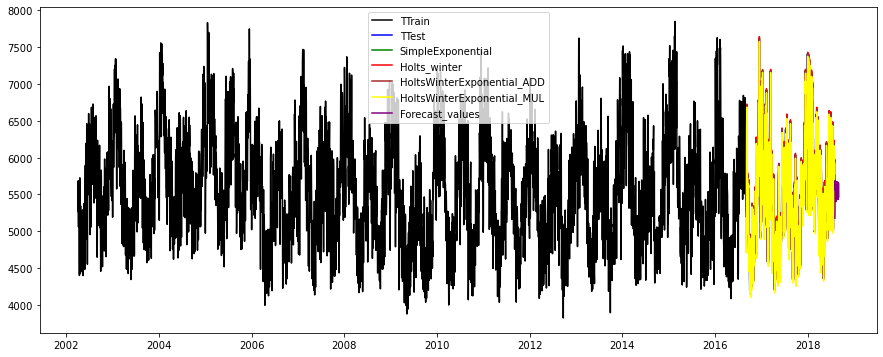

In [341]:
# Visualization of Forecasted values for Test data set using different methods 

plt.figure(figsize=(15,6))

plt.plot(TTrain.index, TTrain["PJMW_MW"], label='TTrain',color="black")
plt.plot(TTest.index, TTest["PJMW_MW"], label='TTest',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_ADD",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_MUL",color="yellow")
plt.plot(pred_test,label='Forecast_values',color='purple')
plt.legend(loc='best')

In [417]:
# Combining the Models and their MAPE values in a dataframe

mapes_values={'Models':pd.Series(['Simple_Exponential','Holt','Holt_Winter_Add','Holt_Winter_Mul']),
              'RMSE_Values':pd.Series([rmse_sim,rmse_holt,rmse_holt_win_add,rmse_holt_win_mul]),
           'MAPE_Values':pd.Series([mape_Sim,mape_Holt,mape_holt_win_add,mape_holt_win_mul])}
mapes_values=pd.DataFrame(mapes_values)
mapes_values

Models  RMSE_Values  MAPE_Values
0  Simple_Exponential   391.634047     5.415139
1                Holt   392.504156     5.471591
2     Holt_Winter_Add   392.866393     5.427764
3     Holt_Winter_Mul   394.345614     5.388758

### ARIMA & SARIMA Models

In [418]:
Ann_daily

PJMW_MW
Datetime               
2002-04-01  5271.173913
2002-04-02  5310.416667
2002-04-03  5325.916667
2002-04-04  5670.791667
2002-04-05  5686.125000
...                 ...
2018-07-30  5492.708333
2018-07-31  5660.750000
2018-08-01  5959.708333
2018-08-02  5805.041667
2018-08-03  5489.000000

[5969 rows x 1 columns]

In [419]:
Daily=Ann_daily.copy()
Daily

PJMW_MW
Datetime               
2002-04-01  5271.173913
2002-04-02  5310.416667
2002-04-03  5325.916667
2002-04-04  5670.791667
2002-04-05  5686.125000
...                 ...
2018-07-30  5492.708333
2018-07-31  5660.750000
2018-08-01  5959.708333
2018-08-02  5805.041667
2018-08-03  5489.000000

[5969 rows x 1 columns]

In [420]:
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [37]:
# On outlier treted data

def adfuller_test(PJMW_MW):
    result = adfuller(PJMW_MW)
    labels = ['ADF test statistics', 'P-value', '#Lags used', 'Number of observation used','Critical Values']
    for value, label in zip(result, labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary')
    else:
        print('Weak evidence against the null hypothesis (Ho), time series has a unit root, indicating it is non stationary. ')
        
        
adfuller_test(Daily)

ADF test statistics : -7.167923291974095
P-value : 2.854115649439333e-10
#Lags used : 33
Number of observation used : 5935
Critical Values : {'1%': -3.43145229664056, '5%': -2.8620271128107553, '10%': -2.56702928783387}
Strong evidence against the null hypothesis (Ho), Reject the null hypothesis, Data has no unit root and is stationary


In [421]:
maily=Daily.copy()
maily

PJMW_MW
Datetime               
2002-04-01  5271.173913
2002-04-02  5310.416667
2002-04-03  5325.916667
2002-04-04  5670.791667
2002-04-05  5686.125000
...                 ...
2018-07-30  5492.708333
2018-07-31  5660.750000
2018-08-01  5959.708333
2018-08-02  5805.041667
2018-08-03  5489.000000

[5969 rows x 1 columns]

### Converting Non-Stationary Time Series into Stationary

### Differencing

In this method, we compute the difference of consecutive terms in the series. Differencing is typically performed to get rid of the varying mean. Mathematically, differencing can be written as:

yt‘ = yt – y(t-1)

where yt is the value at a time t

Applying differencing on our series and plotting the results: So by using rolling mean as a differencing technique

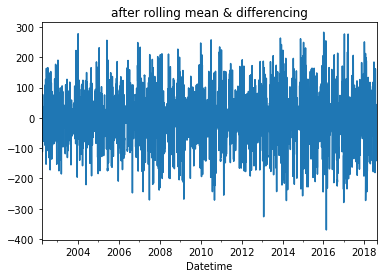

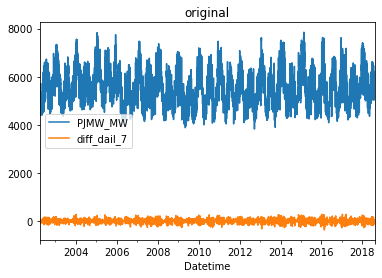

In [423]:
rolling_mean = maily['PJMW_MW'].rolling(window =7).mean()
maily['diff_dail_7'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
maily['diff_dail_7'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
maily.plot(title='original');

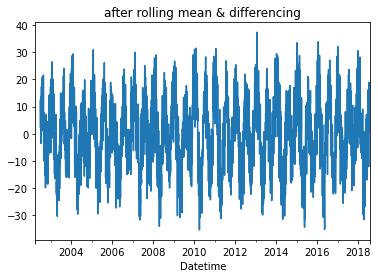

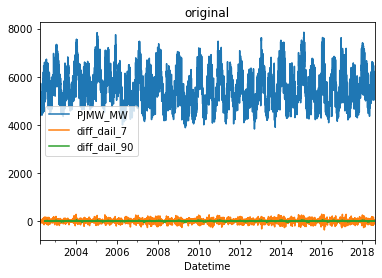

In [424]:
rolling_mean = maily['PJMW_MW'].rolling(window =90).mean()
maily['diff_dail_90'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
maily['diff_dail_90'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
maily.plot(title='original');

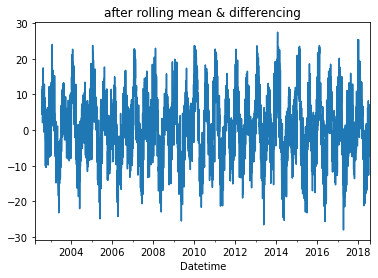

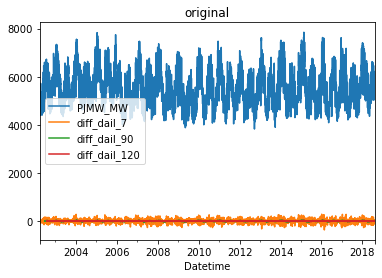

In [426]:
rolling_mean = maily['PJMW_MW'].rolling(window =120).mean()
maily['diff_dail_120'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
maily['diff_dail_120'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
maily.plot(title='original');

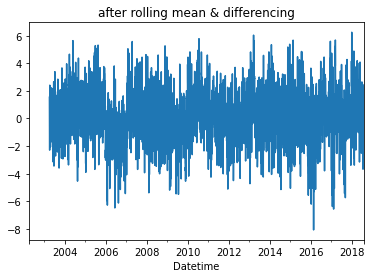

In [428]:
rolling_mean = maily['PJMW_MW'].rolling(window =365).mean()
maily['diff_dail_365'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
maily['diff_dail_365'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
maily.plot(title='original');

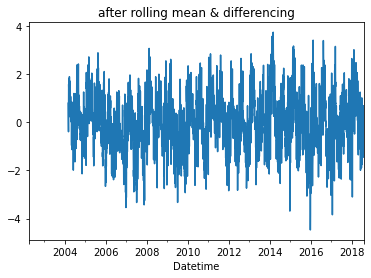

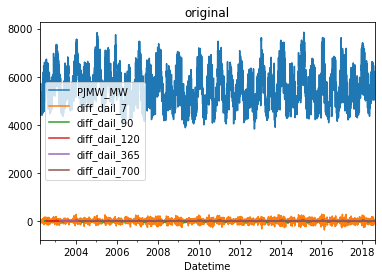

In [430]:
rolling_mean = maily['PJMW_MW'].rolling(window =700).mean()
maily['diff_dail_700'] = rolling_mean - rolling_mean.shift()
ax1 = plt.subplot()
maily['diff_dail_700'].plot(title='after rolling mean & differencing');
ax2 = plt.subplot()
maily.plot(title='original');

In [432]:
# ACF & PACF plots with respect to 'daily' data 
figure,axesbi=plt.subplots(6,2,figsize=(25,40))

# Whole Data
fig=plot_acf(maily["PJMW_MW"] ,lags=40,ax=axesbi[0,0])
axesbi[0,0].set_title('ACF_Whole_Data')


fig=plot_pacf(maily["PJMW_MW"].dropna() ,lags=40,ax=axesbi[0,1])
axesbi[0,1].set_title('PACF_Whole_Data')


# 7days- Data
fig=plot_acf(maily["diff_dail_7"].dropna(),lags=40 ,ax=axesbi[1,0])
axesbi[1,0].set_title('ACF_diff_dail_7]')


fig=plot_pacf(maily["diff_dail_7"].dropna() ,lags=40,ax=axesbi[1,1])
axesbi[1,1].set_title('PACF_diff_dail_7')

# 90 days- Data
fig=plot_acf(maily["diff_dail_90"].dropna() ,lags=40,ax=axesbi[2,0])
axesbi[2,0].set_title('ACF_diff_dail_90]')


fig=plot_pacf(maily["diff_dail_90"].dropna(),lags=40,ax=axesbi[2,1])
axesbi[2,1].set_title('PACF_diff_dail_90')

# 120 days- Data
fig=plot_acf(maily["diff_dail_120"].dropna(),lags=40 ,ax=axesbi[3,0])
axesbi[3,0].set_title('ACF_diff_dail_120]')


fig=plot_pacf(maily["diff_dail_120"].dropna(),lags=40,ax=axesbi[3,1])
axesbi[3,1].set_title('PACF_diff_dail_120')

# 365 days- Data
fig=plot_acf(maily["diff_dail_365"].dropna() ,lags=40,ax=axesbi[4,0])
axesbi[4,0].set_title('ACF_diff_dail_365]')


fig=plot_pacf(maily["diff_dail_365"].dropna() ,lags=40,ax=axesbi[4,1])
axesbi[4,1].set_title('PACF_diff_dail_365')

# 700 days- Data
fig=plot_acf(maily["diff_dail_700"].dropna() ,lags=40,ax=axesbi[5,0])
axesbi[5,0].set_title('ACF_diff_dail_700]')


fig=plot_pacf(maily["diff_dail_700"].dropna() ,lags=40,ax=axesbi[5,1])
axesbi[5,1].set_title('PACF_diff_dail_700')

Text(0.5, 1.0, 'PACF_diff_dail_700')

In [433]:
maily

PJMW_MW  diff_dail_7  diff_dail_90  diff_dail_120  \
Datetime                                                            
2002-04-01  5271.173913          NaN           NaN            NaN   
2002-04-02  5310.416667          NaN           NaN            NaN   
2002-04-03  5325.916667          NaN           NaN            NaN   
2002-04-04  5670.791667          NaN           NaN            NaN   
2002-04-05  5686.125000          NaN           NaN            NaN   
...                 ...          ...           ...            ...   
2018-07-30  5492.708333   -58.190476      4.835648       6.525000   
2018-07-31  5660.750000   -68.845238      5.293056       0.636111   
2018-08-01  5959.708333   -10.928571      4.366204       2.904861   
2018-08-02  5805.041667   -58.773810      4.602315       2.568403   
2018-08-03  5489.000000   -69.964286     10.569907      -3.947917   

            diff_dail_365  diff_dail_700  
Datetime                                  
2002-04-01            NaN            NaN  
2002-04-02            NaN            NaN  
2002-04-03            NaN            NaN  
2002-04-04            NaN            NaN  
2002-04-05            NaN            NaN  
...                   ...            ...  
2018-07-30       1.733790      -1.445774  
2018-07-31      -0.265753      -0.865714  
2018-08-01      -0.153311      -0.112738  
2018-08-02      -1.125799      -0.067917  
2018-08-03      -1.964269       0.360833  

[5969 rows x 6 columns]

In [434]:
fig=plot_acf(maily['diff_dail_7'].dropna(),lags=40)

### DIFFERENCING DATA ###


fig=plot_pacf(maily['diff_dail_7'].dropna() ,lags=40)

### Observation:

d=2,p= 1,2 ,q=1,3

### Splitting data in Train and Test

- Training Data = Fit the model only to training period.

- Testing Data = Assess the model performance on Testing.

- Deploy model by training on whole dataset. No random partition That’s because the order sequence of the time series should be intact in order to use it for forecasting.

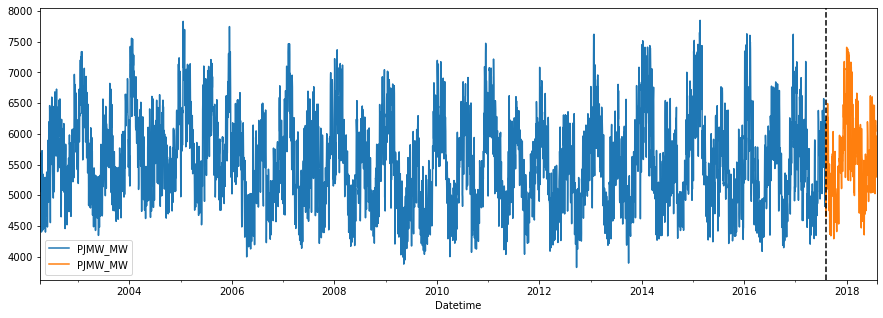

In [436]:
train = Daily.loc[Daily.index<'2017-08-04']
test =Daily.loc[Daily.index>='2017-08-04']
fig,ax=plt.subplots(figsize=(15,5))
train.plot(ax=ax,label='Train data')
test.plot(ax=ax,label='Test data')
ax.axvline('2017-08-04',color='black',ls='--')
plt.show()

In [437]:
print(train.shape,test.shape)

(5604, 1) (365, 1)


### Time Series Decomposition

1) Seasonality Seasonality is a simple term that means while predicting a time series data there are some months in a particular domain where the output value is at a peak as compared to other months. for example if you observe the data of tours and travels companies of past 3 years then you can see that in November and December the distribution will be very high due to holiday season and festival season. So while forecasting time series data we need to capture this seasonality.

2) Trend The trend is also one of the important factors which describe that there is certainly increasing or decreasing trend time series, which actually means the value of organization or sales over a period of time and seasonality is increasing or decreasing.

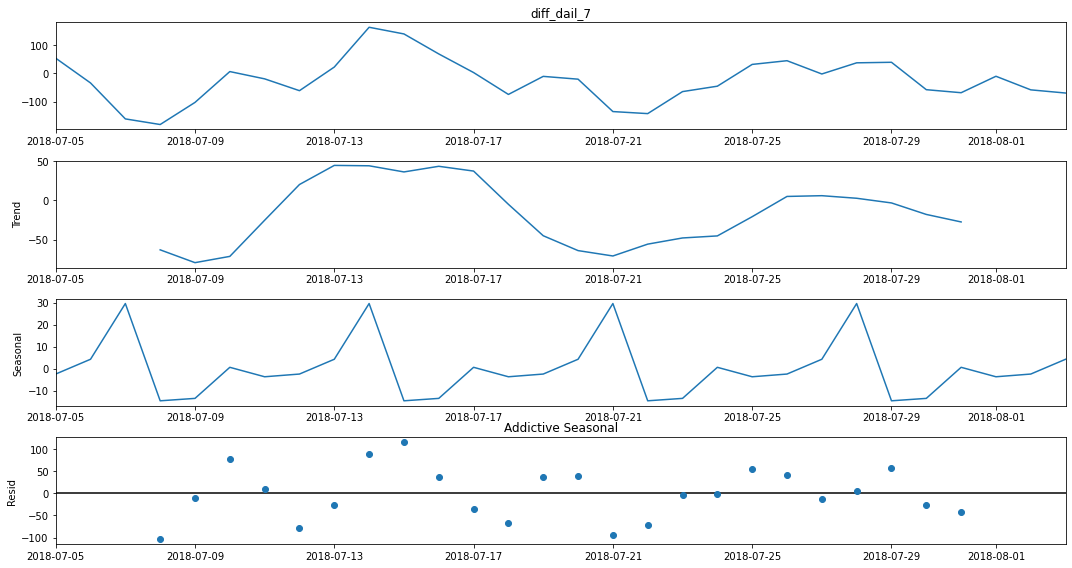

In [438]:
### diff_dail_7

decompose_ts_add=seasonal_decompose(maily['diff_dail_7'].tail(30),model='addictive',period=7)
with plt.rc_context():
    plt.rc('figure',figsize=(15,8))
    decompose_ts_add.plot()
    plt.title('Addictive Seasonal')
    plt.show()


- Observed - Actual data

- Trend - Increasing or decreasing trend.

- Seasonal -
Each cycle represents each year trend.
The value in the Y-axis has to be added to the Trend plot value to get the actual value of that year.

- Residual - It is the noise pattern of the time series data for each year, which was not captured by the two components - Trend and Seasonality. Residual is the left over after decomposition of the two major components (Trend and Seasonality)



### Observation :

1. There is Downward and Upward trend.

2. There is sesonality in data. It Varies from +30 to -10 with the mean 0.

3. Residual - It is the noise pattern of the time series data for each year, which was not captured by the two components - Trend and Seasonality. Residual is the left over after decomposition of the two major components (Trend and Seasonality)

### ARIMA model ###

### Assumptions of ARIMA model

Data should be stationary – by stationary it means that the properties of the series doesn’t depend on the time when it is captured. A white noise series and series with cyclic behavior can also be considered as stationary series.

Data should be univariate – ARIMA works on a single variable. Auto-regression is all about regression with the past values.

### ARIMA Hyperparameter Tuning

- order(p,d,q)

- p = Periods to lag for eg: (if P= 3 then we will use the three previous periods of our time series in the autoregressive portion of the calculation) P helps adjust the line that is being fitted to forecast the series.

- d = In an ARIMA model we transform a time series into stationary one(series without trend or seasonality) using differencing. D refers to the number of differencing transformations required by the time series to get stationary.

- q = This variable denotes the lag of the error component, where error component is a part of the time series not explained by trend or seasonality.

In [507]:
from statsmodels.tsa.arima_model import ARIMA

import statsmodels.api as sm

from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# d=1,p= 1,2 ,q=1,3

In [153]:
mod = sm.tsa.arima.ARIMA(train, order=(1,1,1))
mod = mod.fit()
print(mod.summary())

                               SARIMAX Results                                
Dep. Variable:                PJMW_MW   No. Observations:                 5604
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -41171.622
Date:                Mon, 17 Oct 2022   AIC                          82349.245
Time:                        12:44:30   BIC                          82369.138
Sample:                    04-01-2002   HQIC                         82356.177
                         - 08-03-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4630      0.034    -13.648      0.000      -0.530      -0.397
ma.L1          0.6961      0.026     26.655      0.000       0.645       0.747
sigma2      1.413e+05   2287.045     61.767      0.0

In [154]:
n_steps = 365
fc7 = mod.forecast(n_steps,alpha=0.05)

In [155]:
fitted_series7 = pd.Series(fc7,index=test.index)
fitted_series7=fitted_series7.bfill(axis ='rows')
fig, ax = plt.subplots(figsize=(15,7))

# plt.plot(daily_data)
plt.plot(Daily[-900:].index,Daily[-900:].values, label='Actual values', color="blue")
plt.plot(fitted_series7[-365:].index, fitted_series7[-365:].values,label='Prediction', color="green", marker="o")

# plt.plot(fitted_series)

plt.title("ARIMA forecast - electricity cosumption for 1 month")
plt.xlabel("Time Stamp")
plt.ylabel("Electricity consumption")
plt.legend()

plt.show()

In [156]:
def mape(forecast,actual):
    mape=round(np.mean(np.abs(forecast - actual)/np.abs(actual))*100,2)
    return mape

In [157]:
def mae(forecast,actual):
    mae=round(np.mean(np.abs(forecast - actual)),2)
    return mae

In [158]:
def rmse(forecast,actual):
    rmse = round(np.mean(np.abs(forecast - actual)**2)**.5,2)
    return rmse

In [159]:
MAPE_7= mape(fitted_series7.values, test.values)
MAE_7= mae(fitted_series7.values, test.values)
print("MAPE_7: ",MAPE_7)
print("MAE_7: ",MAE_7)

MAPE_7:  13.55
MAE_7:  716.99


In [160]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_7=sqrt((mean_squared_error(fitted_series7.values,test.values)))
rmse_7

848.3775987957241

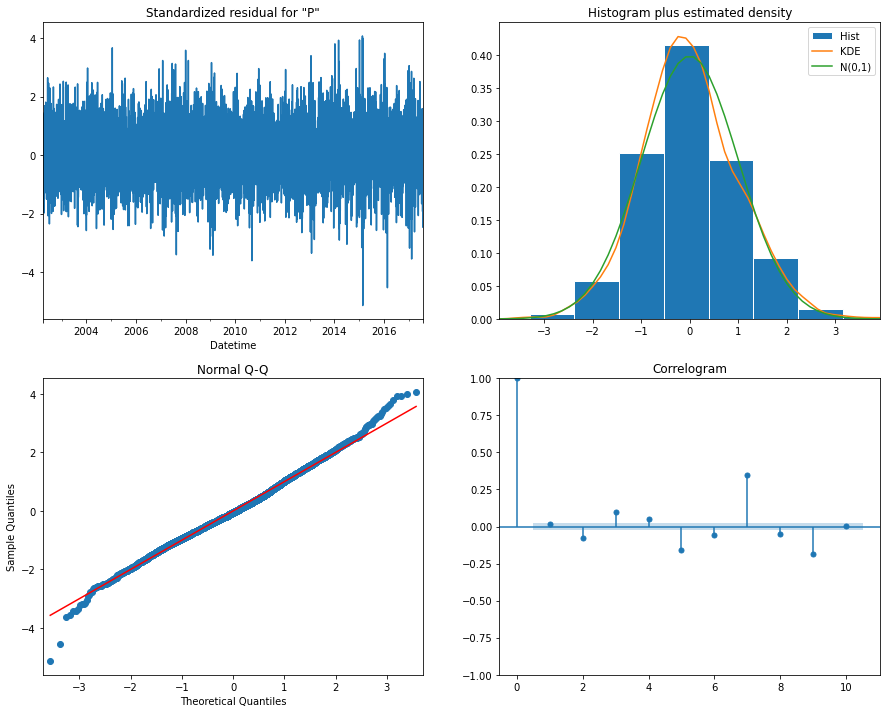

In [500]:
# Diagnostic plot

mod.plot_diagnostics(figsize=(15, 12));

-- The residuals have a constant variance.

-- Model follows almost normal distribution.

-- Majority of the dots lie on the red line in the Normal Q-Q plot so model is fitted well.

-- The residuals are auto correlated as there is significant pattern.

In [171]:
mod = sm.tsa.arima.ARIMA(train, order=(2,1,1))
mod = mod.fit()
print(mod.summary())

                               SARIMAX Results                                
Dep. Variable:                PJMW_MW   No. Observations:                 5604
Model:                 ARIMA(2, 1, 1)   Log Likelihood              -40667.156
Date:                Mon, 17 Oct 2022   AIC                          81342.312
Time:                        12:47:22   BIC                          81368.836
Sample:                    04-01-2002   HQIC                         81351.555
                         - 08-03-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8039      0.014     55.659      0.000       0.776       0.832
ar.L2         -0.3910      0.012    -31.425      0.000      -0.415      -0.367
ma.L1         -0.8149      0.011    -73.164      0.0

In [172]:
n_steps = 365
fc7 = mod.forecast(n_steps,alpha=0.05)

In [173]:
fitted_series7 = pd.Series(fc7,index=test.index)
fitted_series7=fitted_series7.bfill(axis ='rows')
fig, ax = plt.subplots(figsize=(15,7))

# plt.plot(daily_data)
plt.plot(Daily[-900:].index,Daily[-900:].values, label='Actual values', color="blue")
plt.plot(fitted_series7[-365:].index, fitted_series7[-365:].values,label='Prediction', color="green", marker="o")

# plt.plot(fitted_series)

plt.title("ARIMA forecast - electricity cosumption for 1 month")
plt.xlabel("Time Stamp")
plt.ylabel("Electricity consumption")
plt.legend()

plt.show()

In [174]:
MAPE_7= mape(fitted_series7.values, test.values)
MAE_7= mae(fitted_series7.values, test.values)
print("MAPE_7: ",MAPE_7)
print("MAE_7: ",MAE_7)

MAPE_7:  10.44
MAE_7:  571.73


In [175]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_7=sqrt((mean_squared_error(fitted_series7.values,test.values)))
rmse_7

691.2609933413883

### SARIMA model ###

In [442]:
# ACF & PACF plots with respect to 'daily' data 
figure,axesbi=plt.subplots(2,2,figsize=(15,7))

# 7 day- Data
fig=plot_acf(Daily.diff(7).dropna(),lags=40,ax=axesbi[0,0])
axesbi[0,0].set_title('ACF_diff_dail_7')


fig=plot_pacf(Daily.diff(7).dropna() ,lags=40,ax=axesbi[0,1])
axesbi[0,1].set_title('PACF_diff_dail_7')

# double differencing

fig=tsa_plots.plot_acf(Daily.diff(7).diff().dropna(),lags=40,ax=axesbi[1,0])
axesbi[1,0].set_title('ACF_double_diff_dail_7')

fig=tsa_plots.plot_pacf(Daily.diff(7).diff().dropna(),lags=40,ax=axesbi[1,1])
axesbi[1,1].set_title('PACF_double_diff_dail_7')





Text(0.5, 1.0, 'PACF_double_diff_dail_7')

### Observations :

-- P=0,1  ,D=1,   Q=0,1

-- d=1, p= 1,2, q=1,3

In [512]:
model_7=sm.tsa.statespace.SARIMAX(train,order=(1,1,3),seasonal_order=(1,1,0,7))
fitted_7 = model_7.fit(disp=-1)
print(fitted_7.summary())

                                     SARIMAX Results                                      
Dep. Variable:                            PJMW_MW   No. Observations:                 5604
Model:             SARIMAX(1, 1, 3)x(1, 1, [], 7)   Log Likelihood              -40221.426
Date:                            Sat, 22 Oct 2022   AIC                          80454.852
Time:                                    18:24:22   BIC                          80494.631
Sample:                                04-01-2002   HQIC                         80468.715
                                     - 08-03-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6426      0.017     36.969      0.000       0.609       0.677
ma.L1         -0.6447      1.096   

In [510]:
n_steps = 365
fc7 = fitted_7.forecast(n_steps,alpha=0.05)

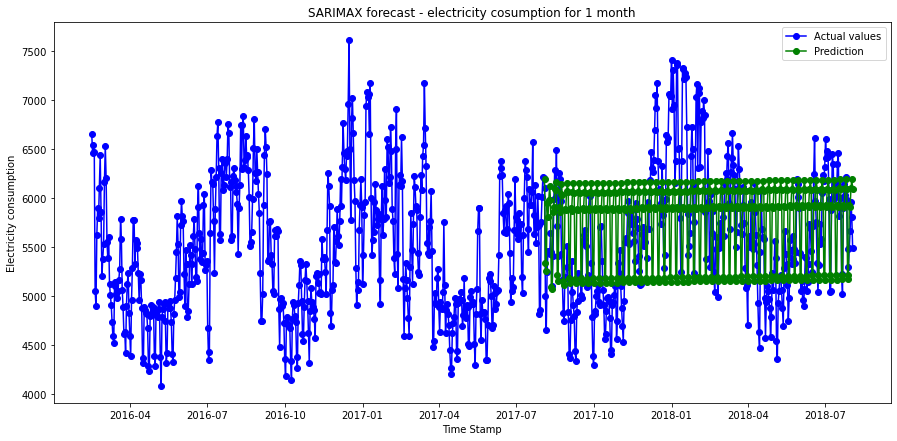

In [179]:
fitted_series7 = pd.Series(fc7,index=test.index)
fitted_series7=fitted_series7.bfill(axis ='rows')
fig, ax = plt.subplots(figsize=(15,7))

# plt.plot(daily_data)
plt.plot(Daily[-900:].index,Daily[-900:].values, label='Actual values', color="blue", marker="o")
plt.plot(fitted_series7[-365:].index, fitted_series7[-365:].values,label='Prediction', color="green", marker="o")

# plt.plot(fitted_series)

plt.title("SARIMAX forecast - electricity cosumption for 1 month")
plt.xlabel("Time Stamp")
plt.ylabel("Electricity consumption")
plt.legend()

plt.show()

In [180]:
MAPE_7= mape(fitted_series7.values, test.values)
MAE_7= mae(fitted_series7.values, test.values)
print("MAPE_7: ",MAPE_7)
print("MAE_7: ",MAE_7)

MAPE_7:  11.68
MAE_7:  645.42


In [181]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_7=sqrt((mean_squared_error(fitted_series7.values,test.values)))
rmse_7

685.1244595799783

### second model (1,1,3)(1,1,0,90)

In [187]:
model_7=sm.tsa.statespace.SARIMAX(train,order=(1,1,3),seasonal_order=(1,1,0,90))
fitted_7 = model_7.fit(low_memory=True,cov_type='approx')
print(fitted_7.summary())

                                      SARIMAX Results                                      
Dep. Variable:                             PJMW_MW   No. Observations:                 5604
Model:             SARIMAX(1, 1, 3)x(1, 1, [], 90)   Log Likelihood              -41304.396
Date:                             Mon, 17 Oct 2022   AIC                          82620.793
Time:                                     13:31:20   BIC                          82660.482
Sample:                                 04-01-2002   HQIC                         82634.635
                                      - 08-03-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0954      0.051     -1.888      0.059      -0.194       0.004
ma.L1          0.0955      

In [188]:
n_steps = 365
fc7 = fitted_7.forecast(n_steps,alpha=0.05)

In [189]:
fitted_series7 = pd.Series(fc7,index=test.index)
fitted_series7=fitted_series7.bfill(axis ='rows')
fig, ax = plt.subplots(figsize=(15,7))

# plt.plot(daily_data)
plt.plot(Daily[-900:].index,Daily[-900:].values, label='Actual values', color="blue", marker="o")
plt.plot(fitted_series7[-365:].index, fitted_series7[-365:].values,label='Prediction', color="green", marker="o")

# plt.plot(fitted_series)

plt.title("SARIMAX forecast - electricity cosumption for 1 month")
plt.xlabel("Time Stamp")
plt.ylabel("Electricity consumption")
plt.legend()

plt.show()

In [190]:
MAPE_7= mape(fitted_series7.values, test.values)
MAE_7= mae(fitted_series7.values, test.values)
print("MAPE_7: ",MAPE_7)
print("MAE_7: ",MAE_7)

MAPE_7:  13.34
MAE_7:  723.26


In [192]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_7=sqrt((mean_squared_error(fitted_series7.values,test.values)))
rmse_7

831.743301342704

### second model (2,1,3)(1,1,0,90)

In [198]:
model_7=sm.tsa.statespace.SARIMAX(train,order=(2,1,3),seasonal_order=(1,1,0,90))
fitted_7 = model_7.fit(low_memory=True,cov_type='approx')
print(fitted_7.summary())

                                      SARIMAX Results                                      
Dep. Variable:                             PJMW_MW   No. Observations:                 5604
Model:             SARIMAX(2, 1, 3)x(1, 1, [], 90)   Log Likelihood              -41298.405
Date:                             Mon, 17 Oct 2022   AIC                          82610.809
Time:                                     16:35:59   BIC                          82657.113
Sample:                                 04-01-2002   HQIC                         82626.958
                                      - 08-03-2017                                         
Covariance Type:                            approx                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1255      0.041     -3.095      0.002      -0.205      -0.046
ar.L2         -0.1296      

In [199]:
n_steps = 365
fc7 = fitted_7.forecast(n_steps,alpha=0.05)

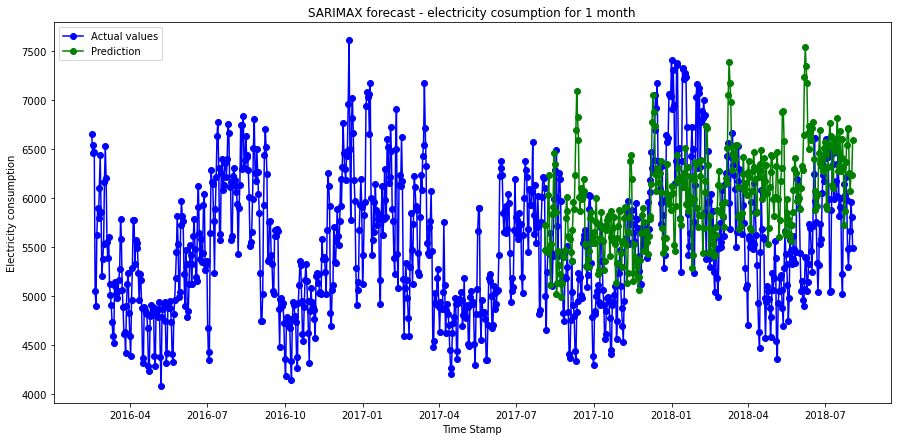

In [200]:
fitted_series7 = pd.Series(fc7,index=test.index)
fitted_series7=fitted_series7.bfill(axis ='rows')
fig, ax = plt.subplots(figsize=(15,7))

# plt.plot(daily_data)
plt.plot(Daily[-900:].index,Daily[-900:].values, label='Actual values', color="blue", marker="o")
plt.plot(fitted_series7[-365:].index, fitted_series7[-365:].values,label='Prediction', color="green", marker="o")

# plt.plot(fitted_series)

plt.title("SARIMAX forecast - electricity cosumption for 1 month")
plt.xlabel("Time Stamp")
plt.ylabel("Electricity consumption")
plt.legend()

plt.show()

In [201]:
MAPE_7= mape(fitted_series7.values, test.values)
MAE_7= mae(fitted_series7.values, test.values)
print("MAPE_7: ",MAPE_7)
print("MAE_7: ",MAE_7)

MAPE_7:  13.27
MAE_7:  720.03


In [202]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_7=sqrt((mean_squared_error(fitted_series7.values,test.values)))
rmse_7

827.9111529815044

### second model (2,1,3)(1,1,0,120)

In [193]:
model_7=sm.tsa.statespace.SARIMAX(train,order=(2,1,3),seasonal_order=(1,1,0,120))
fitted_7 = model_7.fit(low_memory=True,cov_type='approx')
print(fitted_7.summary())

                                      SARIMAX Results                                       
Dep. Variable:                              PJMW_MW   No. Observations:                 5604
Model:             SARIMAX(2, 1, 3)x(1, 1, [], 120)   Log Likelihood              -41076.605
Date:                              Mon, 17 Oct 2022   AIC                          82167.209
Time:                                      15:06:45   BIC                          82213.475
Sample:                                  04-01-2002   HQIC                         82183.349
                                       - 08-03-2017                                         
Covariance Type:                             approx                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2016      0.032     -6.224      0.000      -0.265      -0.138
ar.L2         -0.21

In [194]:
n_steps = 365
fc7 = fitted_7.forecast(n_steps,alpha=0.05)

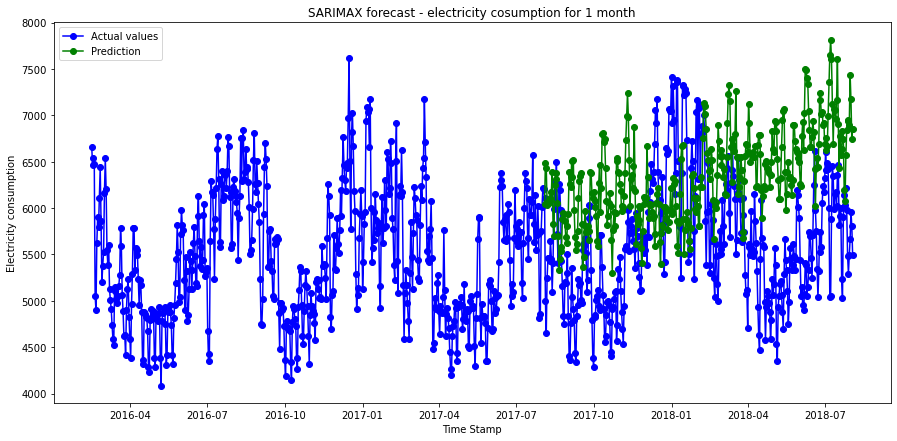

In [195]:
fitted_series7 = pd.Series(fc7,index=test.index)
fitted_series7=fitted_series7.bfill(axis ='rows')
fig, ax = plt.subplots(figsize=(15,7))

# plt.plot(daily_data)
plt.plot(Daily[-900:].index,Daily[-900:].values, label='Actual values', color="blue", marker="o")
plt.plot(fitted_series7[-365:].index, fitted_series7[-365:].values,label='Prediction', color="green", marker="o")

# plt.plot(fitted_series)

plt.title("SARIMAX forecast - electricity cosumption for 1 month")
plt.xlabel("Time Stamp")
plt.ylabel("Electricity consumption")
plt.legend()

plt.show()

In [196]:
MAPE_7= mape(fitted_series7.values, test.values)
MAE_7= mae(fitted_series7.values, test.values)
print("MAPE_7: ",MAPE_7)
print("MAE_7: ",MAE_7)

MAPE_7:  16.63
MAE_7:  885.75


In [197]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_7=sqrt((mean_squared_error(fitted_series7.values,test.values)))
rmse_7

1083.8387659621162

### second model (2,1,3)(1,1,0,364)

In [209]:
data_2year=Daily['2015-08-03':'2017-08-03']

In [210]:
model_364=sm.tsa.statespace.SARIMAX(data_2year,order=(2,1,3),seasonal_order=(1,1,0,364))
fitted_364 = model_364.fit(low_memory=True,cov_type='approx')
print(fitted_364.summary())

                                      SARIMAX Results                                       
Dep. Variable:                              PJMW_MW   No. Observations:                  732
Model:             SARIMAX(2, 1, 3)x(1, 1, [], 364)   Log Likelihood               -2705.626
Date:                              Tue, 18 Oct 2022   AIC                           5425.252
Time:                                      15:02:38   BIC                           5452.589
Sample:                                  08-03-2015   HQIC                          5436.114
                                       - 08-03-2017                                         
Covariance Type:                             approx                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3335      0.052     -6.473      0.000      -0.434      -0.233
ar.L2          0.66

In [211]:
n_steps = 365
fc364 = fitted_364.forecast(n_steps,alpha=0.05)

In [217]:
fitted_series364 = pd.Series(fc364,index=test.index)
fitted_series364=fitted_series364.bfill(axis ='rows')
fig, ax = plt.subplots(figsize=(15,7))
# plt.plot(daily_data)
plt.plot(Daily[-900:].index,Daily[-900:].values, label='Actual values', color="blue")
plt.plot(fitted_series364[-365:].index, fitted_series364[-365:].values,label='Prediction', color="orange")

# plt.plot(fitted_series)

plt.title("SARIMAX forecast - electricity cosumption for 1 month")
plt.xlabel("Time Stamp")
plt.ylabel("Electricity consumption")
plt.legend()

plt.show()

In [214]:
MAPE_7= mape(fitted_series7.values, test.values)
MAE_7= mae(fitted_series7.values, test.values)
print("MAPE_7: ",MAPE_7)
print("MAE_7: ",MAE_7)

MAPE_7:  16.86
MAE_7:  902.03


In [215]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse_7=sqrt((mean_squared_error(fitted_series7.values,test.values)))
rmse_7

987.9961232354904

### Different Models

In [536]:
Ann_daily

PJMW_MW
Datetime               
2002-04-01  5271.173913
2002-04-02  5310.416667
2002-04-03  5325.916667
2002-04-04  5670.791667
2002-04-05  5686.125000
...                 ...
2018-07-30  5492.708333
2018-07-31  5660.750000
2018-08-01  5959.708333
2018-08-02  5805.041667
2018-08-03  5489.000000

[5969 rows x 1 columns]

In [537]:
# Converting to csv

# Ann_daily.to_csv('Daily_data.csv')

In [35]:
DDaily=Ann_daily.copy()
DDaily

PJMW_MW
2002-04-01  5271.173913
2002-04-02  5310.416667
2002-04-03  5325.916667
2002-04-04  5670.791667
2002-04-05  5686.125000
...                 ...
2018-07-30  5492.708333
2018-07-31  5660.750000
2018-08-01  5959.708333
2018-08-02  5805.041667
2018-08-03  5489.000000

[5969 rows x 1 columns]

In [36]:
# Creating x-axis with respect roll-down column by shifting one by one row

DDaily['1_dayback']=DDaily['PJMW_MW'].shift(+1)
DDaily['2_dayback']=DDaily['PJMW_MW'].shift(+2)
DDaily['3_dayback']=DDaily['PJMW_MW'].shift(+3)
DDaily['4_dayback']=DDaily['PJMW_MW'].shift(+4)
DDaily['5_dayback']=DDaily['PJMW_MW'].shift(+5)
DDaily['6_dayback']=DDaily['PJMW_MW'].shift(+6)
DDaily['7_dayback']=DDaily['PJMW_MW'].shift(+7)

DDaily

PJMW_MW    1_dayback    2_dayback    3_dayback    4_dayback  \
2002-04-01  5271.173913          NaN          NaN          NaN          NaN   
2002-04-02  5310.416667  5271.173913          NaN          NaN          NaN   
2002-04-03  5325.916667  5310.416667  5271.173913          NaN          NaN   
2002-04-04  5670.791667  5325.916667  5310.416667  5271.173913          NaN   
2002-04-05  5686.125000  5670.791667  5325.916667  5310.416667  5271.173913   
...                 ...          ...          ...          ...          ...   
2018-07-30  5492.708333  5293.833333  5485.791667  5978.750000  6216.458333   
2018-07-31  5660.750000  5492.708333  5293.833333  5485.791667  5978.750000   
2018-08-01  5959.708333  5660.750000  5492.708333  5293.833333  5485.791667   
2018-08-02  5805.041667  5959.708333  5660.750000  5492.708333  5293.833333   
2018-08-03  5489.000000  5805.041667  5959.708333  5660.750000  5492.708333   

              5_dayback    6_dayback    7_dayback  
2002-04-01          NaN          NaN          NaN  
2002-04-02          NaN          NaN          NaN  
2002-04-03          NaN          NaN          NaN  
2002-04-04          NaN          NaN          NaN  
2002-04-05          NaN          NaN          NaN  
...                 ...          ...          ...  
2018-07-30  6036.208333  6142.666667  5900.041667  
2018-07-31  6216.458333  6036.208333  6142.666667  
2018-08-01  5978.750000  6216.458333  6036.208333  
2018-08-02  5485.791667  5978.750000  6216.458333  
2018-08-03  5293.833333  5485.791667  5978.750000  

[5969 rows x 8 columns]

In [37]:
DDaily_1=DDaily.dropna()
DDaily_1

PJMW_MW    1_dayback    2_dayback    3_dayback    4_dayback  \
2002-04-08  5283.875000  5052.479167  5367.791667  5686.125000  5670.791667   
2002-04-09  5136.083333  5283.875000  5052.479167  5367.791667  5686.125000   
2002-04-10  5171.666667  5136.083333  5283.875000  5052.479167  5367.791667   
2002-04-11  5207.875000  5171.666667  5136.083333  5283.875000  5052.479167   
2002-04-12  5090.416667  5207.875000  5171.666667  5136.083333  5283.875000   
...                 ...          ...          ...          ...          ...   
2018-07-30  5492.708333  5293.833333  5485.791667  5978.750000  6216.458333   
2018-07-31  5660.750000  5492.708333  5293.833333  5485.791667  5978.750000   
2018-08-01  5959.708333  5660.750000  5492.708333  5293.833333  5485.791667   
2018-08-02  5805.041667  5959.708333  5660.750000  5492.708333  5293.833333   
2018-08-03  5489.000000  5805.041667  5959.708333  5660.750000  5492.708333   

              5_dayback    6_dayback    7_dayback  
2002-04-08  5325.916667  5310.416667  5271.173913  
2002-04-09  5670.791667  5325.916667  5310.416667  
2002-04-10  5686.125000  5670.791667  5325.916667  
2002-04-11  5367.791667  5686.125000  5670.791667  
2002-04-12  5052.479167  5367.791667  5686.125000  
...                 ...          ...          ...  
2018-07-30  6036.208333  6142.666667  5900.041667  
2018-07-31  6216.458333  6036.208333  6142.666667  
2018-08-01  5978.750000  6216.458333  6036.208333  
2018-08-02  5485.791667  5978.750000  6216.458333  
2018-08-03  5293.833333  5485.791667  5978.750000  

[5962 rows x 8 columns]

### Splitting the data in x and y

In [38]:
x=np.array(DDaily_1.iloc[:,1:8])
print(x.shape)
print('------------------------------------')
print(len(x))

(5962, 7)
------------------------------------
5962


In [39]:
y=np.array(DDaily_1.iloc[:,0])
print(y)
print('------------------------------------')
print(len(y))

[5283.875      5136.08333333 5171.66666667 ... 5959.70833333 5805.04166667
 5489.        ]
------------------------------------
5962


In [40]:
X_train,X_test,y_train,y_test=x[:-360],x[-360:],y[:-360],y[-360:]

### Linear Regression Model

In [453]:
from sklearn.linear_model import LinearRegression

lin_model=LinearRegression()
lin_model.fit(X_train,y_train)


LinearRegression()

In [454]:
lin_pred=lin_model.predict(X_test)

### Random Forest Model

In [455]:
from sklearn.ensemble import RandomForestRegressor

ran_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=10)
ran_model.fit(X_train,y_train)


RandomForestRegressor(max_features=3, random_state=10)

In [456]:
ran_pred=ran_model.predict(X_test)

### XGBoost Model

In [457]:
from xgboost import XGBRegressor

xg_model = XGBRegressor()
xg_model.fit(X_train, y_train, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [458]:
xgb_pred = xg_model.predict(X_test)

In [459]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [460]:
RMSE_LR=np.sqrt(mean_squared_error(lin_pred,y_test))
print('LR_RMSE:',RMSE_LR)
print('------------------------------------')
RMSE_RF=np.sqrt(mean_squared_error(ran_pred,y_test))
print('RF_RMSE:',RMSE_RF)
print('------------------------------------')
RMSE_XGB=np.sqrt(mean_squared_error(xgb_pred,y_test))
print('XGB_RMSE:',RMSE_XGB)

LR_RMSE: 333.98137976103084
------------------------------------
RF_RMSE: 332.1499687899009
------------------------------------
XGB_RMSE: 328.7455088896466


In [461]:
MAPE_LR =np.round((mean_absolute_percentage_error(lin_pred,y_test)*100),3)
print('LR_MAPE:',MAPE_LR)
print('------------------------------------')
MAPE_RF =np.round((mean_absolute_percentage_error(ran_pred,y_test)*100),3)
print('RF_MAPE:',MAPE_RF)
print('------------------------------------')
MAPE_XGB =np.round((mean_absolute_percentage_error(xgb_pred,y_test)*100),3)
print('XGB_MAPE:',MAPE_XGB)

LR_MAPE: 4.68
------------------------------------
RF_MAPE: 4.61
------------------------------------
XGB_MAPE: 4.569


In [514]:
plt.figure(figsize=(15,6))
plt.plot(lin_pred,label='Linear Regression Prediction')
plt.plot(y_test,label='Actual values')
plt.title('LR vs Actual value')
plt.legend()
plt.grid()
plt.show()

In [517]:
plt.figure(figsize=(15,6))
plt.plot(ran_pred,label='Random Forest Prediction',color='purple')
plt.plot(y_test,label='Actual values')
plt.title('RF vs Actual value')
plt.legend()
plt.grid()
plt.show()

In [516]:
plt.figure(figsize=(15,6))
plt.plot(xgb_pred,label='XGBoost Prediction',color='g')
plt.plot(y_test,label='Actual values',color='r')
plt.title('XGBoost vs Actual value')
plt.legend()
plt.grid()
plt.show()

In [467]:
plt.scatter(y_test,lin_pred)

In [468]:
plt.scatter(y_test,ran_pred)

In [469]:
residual = y_test-lin_pred
sns.distplot(residual)

<AxesSubplot:ylabel='Density'>

##  Calculate forecasting accuracy

### 1.LR Model

In [470]:
from sklearn.linear_model import LinearRegression

final_lin_model=LinearRegression()
final_lin_model.fit(x,y)

LinearRegression()

In [471]:
forecast_check_data = np.array(DDaily_1['PJMW_MW'][:'2018-07-04'][-7:])

In [472]:
z=forecast_check_data

for i in range(0,30):
    ck=z[-7:]
    ck=np.array([ck])
    lin_f_chk=final_lin_model.predict(ck)
    z=np.append(z,lin_f_chk)
    i=+1
future_pred_lr=z[-30:]

In [473]:
future_pred_lr

array([6018.45150254, 6259.04671016, 6089.30981574, 6164.41268562,
       6487.78361485, 6222.79432191, 6609.24973992, 5939.01100298,
       6331.46915015, 6029.74532962, 6040.77083041, 6456.00844575,
       5941.03522496, 6767.40745222, 5765.42297767, 6459.22600548,
       5976.05846232, 5916.85830043, 6551.01260138, 5538.62551625,
       7033.91786526, 5441.5567749 , 6663.84176066, 5914.94793646,
       5743.00326666, 6835.88708091, 4939.39343252, 7526.56258687,
       4884.62149661, 6991.2539572 ])

In [474]:
future_chk = pd.date_range('2018-07-05','2018-08-03', freq='D')
future_chk_df = pd.DataFrame(index=future_chk)

In [475]:
future_chk_df['future_chk_energy'] = future_pred_lr.tolist()

In [476]:
plt.figure(figsize=(15,6))
plt.plot(DDaily_1['PJMW_MW'].tail(90),label='Actual values',marker='o')
plt.plot(future_chk_df,label='Forecast',marker='o')
plt.legend()
plt.grid()
plt.show()

### 2.RF Model

In [477]:
from sklearn.ensemble import RandomForestRegressor

final_RF_model=RandomForestRegressor(n_estimators=100,max_features=3, random_state=10)
final_RF_model.fit(x,y)

RandomForestRegressor(max_features=3, random_state=10)

In [478]:
z=forecast_check_data

for i in range(0,30):
    ck=z[-7:]
    ck=np.array([ck])
    rf_f_chk=final_RF_model.predict(ck)
    z=np.append(z,rf_f_chk)
    i=+1
future_pred_RF=z[-30:]

In [479]:
future_pred_RF

array([6054.20916667, 6136.23916667, 5986.99625   , 6159.74416667,
       6537.29208333, 6291.40145833, 6363.75208333, 5912.07666667,
       5933.57541667, 6026.0275    , 6089.75458333, 6475.11875   ,
       6238.53416667, 6320.59958333, 5886.965     , 5949.65166667,
       5891.46916667, 5945.34179348, 6349.88875   , 6124.18      ,
       6319.39875   , 5806.23583333, 5994.415     , 5867.0125    ,
       5906.3875    , 6316.0575    , 5989.93666667, 6351.52      ,
       5638.92875   , 6005.67721014])

In [480]:
future_chk_rf = pd.date_range('2018-07-05','2018-08-03', freq='D')
future_chk_df_rf = pd.DataFrame(index=future_chk_rf)
future_chk_df_rf['future_chk_energy'] = future_pred_RF.tolist()

In [481]:
plt.figure(figsize=(15,6))
plt.plot(DDaily_1['PJMW_MW'].tail(90),label='Actual values',marker='o')
plt.plot(future_chk_df_rf,label='Forecast',marker='o')
plt.legend()
plt.grid()
plt.show()

### 3.XGBoost Model

In [482]:
from xgboost import XGBRegressor

final_xg_model = XGBRegressor()
final_xg_model.fit(x,y, verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [483]:
z=forecast_check_data

for i in range(0,30):
    ck=z[-7:]
    ck=np.array([ck])
    xgb_f_chk=final_xg_model.predict(ck)
    z=np.append(z,xgb_f_chk)
    i=+1
future_pred_XGB=z[-30:]

In [484]:
future_pred_XGB

array([6257.62695312, 6088.43847656, 6259.11230469, 6232.37207031,
       6762.54248047, 6243.73388672, 6517.71679688, 6065.62744141,
       5861.04052734, 6349.65576172, 5919.55029297, 6517.75439453,
       5869.32617188, 6609.71435547, 6172.07666016, 5617.97607422,
       6689.15087891, 4916.06982422, 6439.58544922, 5055.70214844,
       6692.02978516, 5750.38525391, 4922.53662109, 6478.3984375 ,
       4113.57861328, 6910.51708984, 3822.00048828, 6496.60253906,
       5048.68554688, 4218.40283203])

In [485]:
future_chk_xgb = pd.date_range('2018-07-05','2018-08-03', freq='D')
future_chk_df_xgb = pd.DataFrame(index=future_chk_xgb)
future_chk_df_xgb['future_chk_energy'] = future_pred_XGB.tolist()

In [486]:
plt.figure(figsize=(15,6))
plt.plot(DDaily_1['PJMW_MW'].tail(90),label='Actual values',marker='o')
plt.plot(future_chk_df_xgb,label='Forecast',marker='o')
plt.legend()
plt.grid()
plt.show()

### MAPE & RMSE values

In [487]:
Daily_data_30=DDaily['PJMW_MW'].tail(30)
Daily_data_30.head(3)

Datetime
2018-07-05    6419.875000
2018-07-06    5996.125000
2018-07-07    5045.708333
Freq: D, Name: PJMW_MW, dtype: float64

In [488]:
MAPE_check= round((mean_absolute_percentage_error(Daily_data_30,future_chk_df)*100),3)
print('LR_forecast_MAPE:',MAPE_check)
print('------------------------------------')
RMSE_check=np.sqrt(mean_squared_error(future_chk_df,Daily_data_30))
print('LR_forecast_RMSE:',RMSE_check)


LR_forecast_MAPE: 11.006
------------------------------------
LR_forecast_RMSE: 752.4260180492397


In [489]:
MAPE_check= round((mean_absolute_percentage_error(Daily_data_30,future_chk_df_rf)*100),3)
print('RF_forecast_MAPE:',MAPE_check)
print('------------------------------------')
RMSE_check=np.sqrt(mean_squared_error(future_chk_df_rf,Daily_data_30))
print('RF_forecast_RMSE:',RMSE_check)

RF_forecast_MAPE: 6.484
------------------------------------
RF_forecast_RMSE: 469.09756915826824


In [490]:
MAPE_check= round((mean_absolute_percentage_error(Daily_data_30,future_chk_df_xgb)*100),3)
print('XGB_forecast_MAPE:',MAPE_check)
print('------------------------------------')
RMSE_check=np.sqrt(mean_squared_error(future_chk_df_xgb,Daily_data_30))
print('XGB_forecast_RMSE:',RMSE_check)

XGB_forecast_MAPE: 11.856
------------------------------------
XGB_forecast_RMSE: 830.790975636156


In [529]:
# Considering all the data in one frame with respect to there MAPE and RMSE values.

data={'Models': pd.Series(['Arima','Sarima','Linear Regression','Random Forest','XGBoost']),\
     'RMSE': pd.Series([848.3775,987.9961,752.4260,469.0975,830.7909]),\
     'MAPE': pd.Series([13.55,16.86,11.006,6.484, 11.856])}
dataframe=pd.DataFrame(data)
dataframe.sort_values(['MAPE'],inplace=True,ignore_index=True)
dataframe

Models      RMSE    MAPE
0      Random Forest  469.0975   6.484
1  Linear Regression  752.4260  11.006
2            XGBoost  830.7909  11.856
3              Arima  848.3775  13.550
4             Sarima  987.9961  16.860

In [532]:
f, axe = plt.subplots(1,1, figsize=(18,6), dpi=200)
sns.barplot(x='RMSE', y='Models', data=dataframe, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('RMSE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=14)


for i, v in enumerate(np.round(dataframe.RMSE.values,3)):
    axe.text(v + 0.005, i + .15, str(v),
            color = 'black', fontweight = 'bold', fontsize= 14)

plt.show()


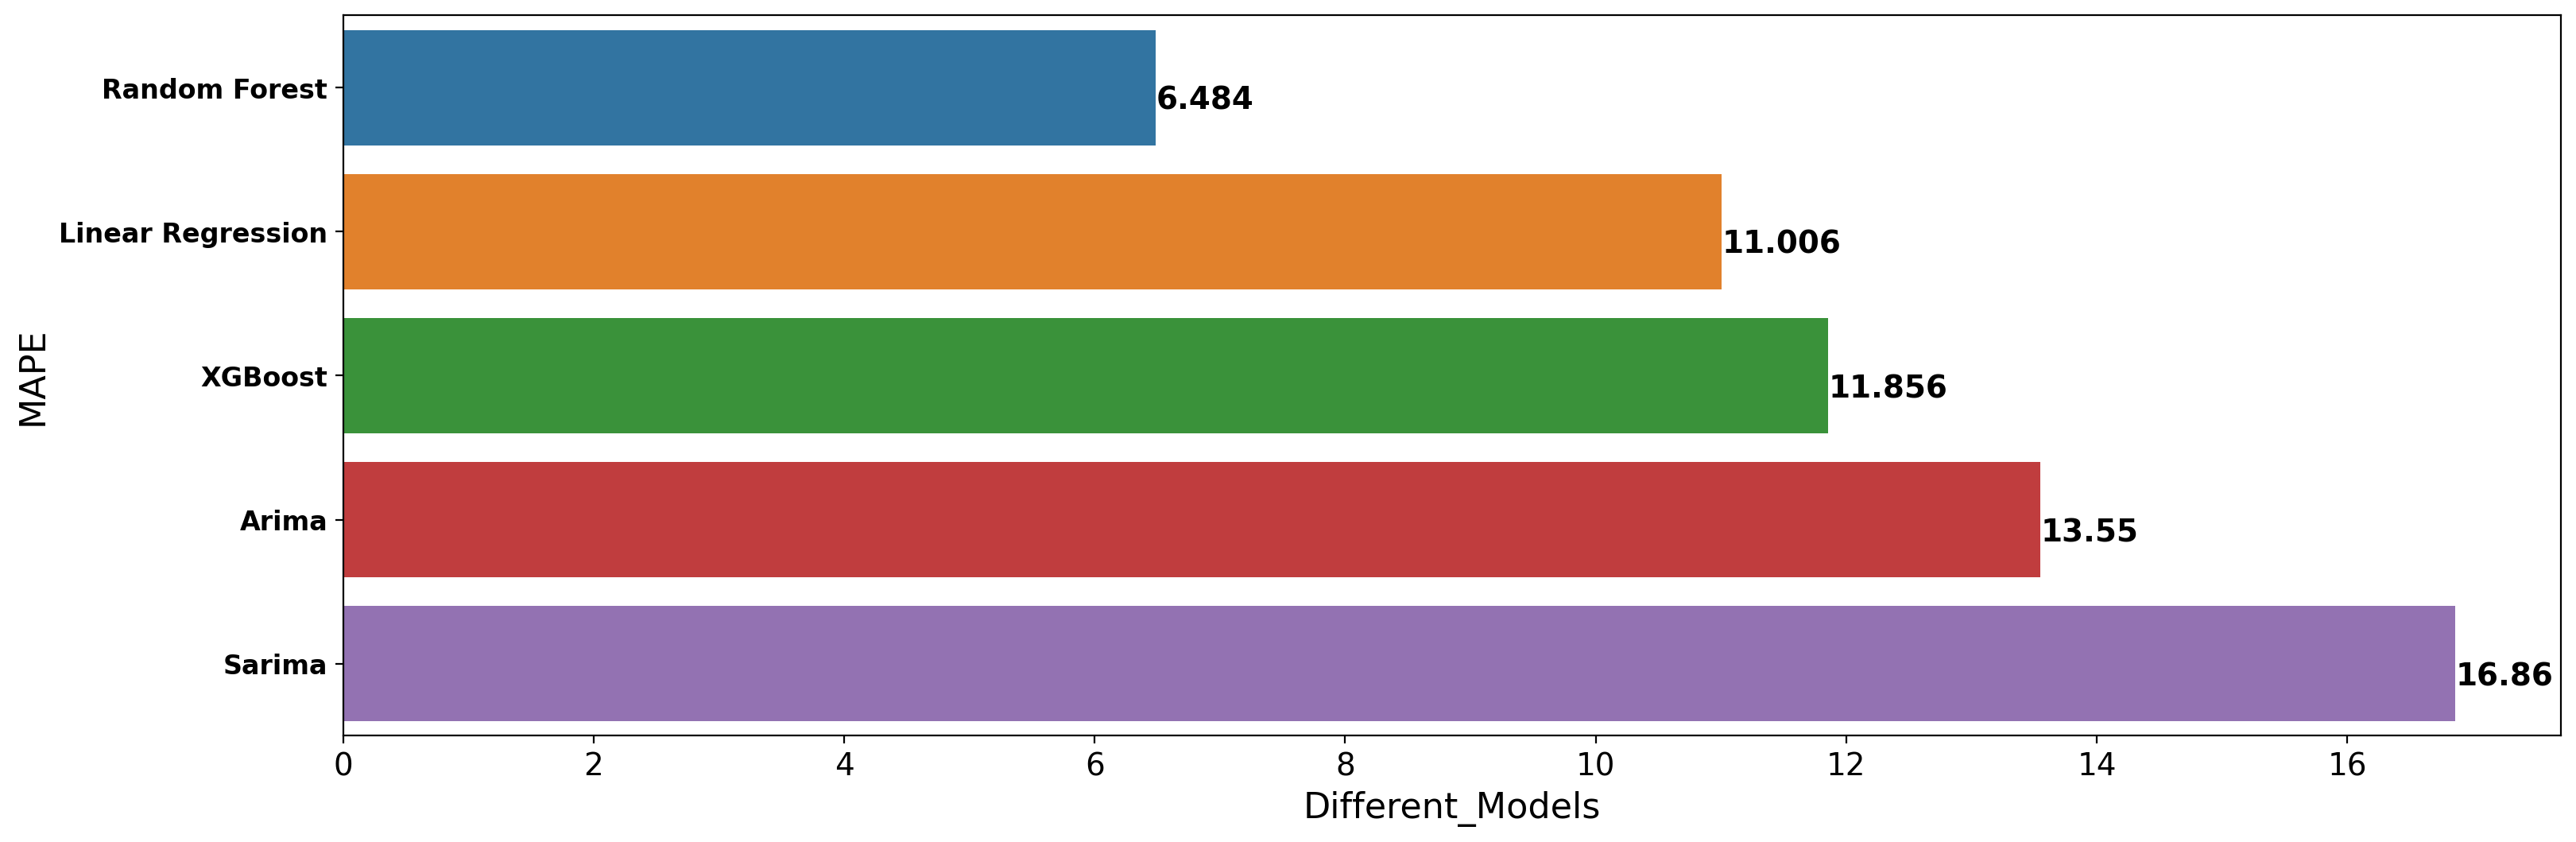

In [533]:
f, axe = plt.subplots(1,1, figsize=(18,6), dpi=200)
sns.barplot(x='MAPE', y='Models', data=dataframe, ax = axe)
axe.set_xlabel('Different_Models', size=16)
axe.set_ylabel('MAPE', size=16)
plt.yticks(fontsize=12,fontweight = 'bold')
plt.xticks(fontsize=14)


for i, v in enumerate(np.round(dataframe.MAPE.values,3)):
    axe.text(v + 0.005, i + .15, str(v),
            color = 'black', fontweight = 'bold', fontsize= 14)

plt.show()

### Observation:

--  The Arima and Sarima model has not performed well because there is the seasonality in the data so they failed to captured the data points and it shows most of the errors, as it contains high 'MAPE' and 'RMSE' values.

--  As with respect to different models like-'Linear Regression','Random Forest', and 'XGBoost' ,thus the 'Random Forest' gives the best results as compared to others, because it contains lowest 'RMSE' and 'MAPE' values.

--  so, we will use 'Random Forest' as final model for prediction purpose.

## Forecast by using Random forest

In [51]:
from sklearn.ensemble import RandomForestRegressor

final_RF_modell=RandomForestRegressor(n_estimators=100,max_features=3, random_state=10)
final_RF_modell.fit(x,y)

RandomForestRegressor(max_features=3, random_state=10)

In [52]:
daily_data_last_7 = np.array(DDaily['PJMW_MW'].tail(7))
daily_data_last_7

array([5485.79166667, 5293.83333333, 5492.70833333, 5660.75      ,
       5959.70833333, 5805.04166667, 5489.        ])

In [54]:
# pd.DataFrame(daily_data_last_7).to_csv("last_7_Daily_data.csv")


In [43]:
z=daily_data_last_7

for i in range(0,30):
    r=z[-7:]
    r=np.array([r])
    ranf_f=final_RF_modell.predict(r)
    z=np.append(z,ranf_f)
    i=+1
future_pred=z[-30:]

In [44]:
future_pred

array([5645.865     , 5318.761875  , 5583.26875   , 5566.73958333,
       5904.509375  , 5811.26895833, 5633.77833333, 5809.473125  ,
       5319.35916667, 5853.49979167, 5326.50583333, 5801.94625   ,
       5766.20625   , 5762.51104167, 5997.73458333, 5339.66208333,
       5930.62354167, 5225.27666667, 5751.81708333, 5562.675     ,
       5635.51875   , 5989.18354167, 5359.49666667, 5986.04583333,
       5116.5575    , 5741.72916667, 5466.00958333, 5654.63958333,
       5896.41666667, 5349.70666667])

In [45]:
future = pd.date_range('2018-08-04','2018-09-02', freq='D')
future_df = pd.DataFrame(index=future)

In [46]:
future_df['future_energy'] = future_pred.tolist()

In [47]:
future_df

future_energy
2018-08-04    5645.865000
2018-08-05    5318.761875
2018-08-06    5583.268750
2018-08-07    5566.739583
2018-08-08    5904.509375
2018-08-09    5811.268958
2018-08-10    5633.778333
2018-08-11    5809.473125
2018-08-12    5319.359167
2018-08-13    5853.499792
2018-08-14    5326.505833
2018-08-15    5801.946250
2018-08-16    5766.206250
2018-08-17    5762.511042
2018-08-18    5997.734583
2018-08-19    5339.662083
2018-08-20    5930.623542
2018-08-21    5225.276667
2018-08-22    5751.817083
2018-08-23    5562.675000
2018-08-24    5635.518750
2018-08-25    5989.183542
2018-08-26    5359.496667
2018-08-27    5986.045833
2018-08-28    5116.557500
2018-08-29    5741.729167
2018-08-30    5466.009583
2018-08-31    5654.639583
2018-09-01    5896.416667
2018-09-02    5349.706667

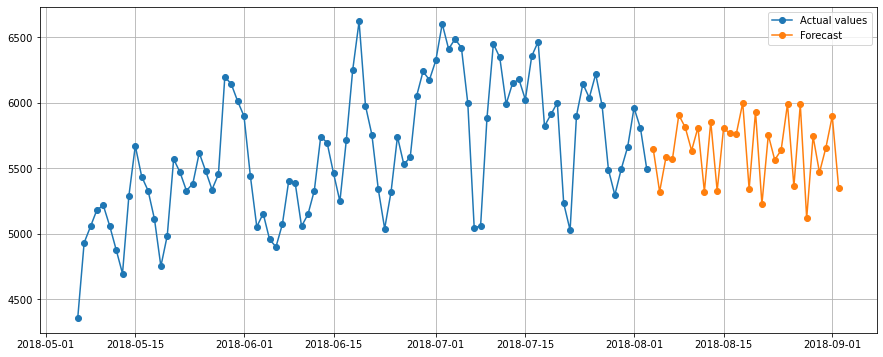

In [48]:
plt.figure(figsize=(15,6))
plt.plot(DDaily_1['PJMW_MW'].tail(90),label='Actual values',marker='o')
plt.plot(future_df,label='Forecast',marker='o')
plt.legend()
plt.grid()
plt.show()

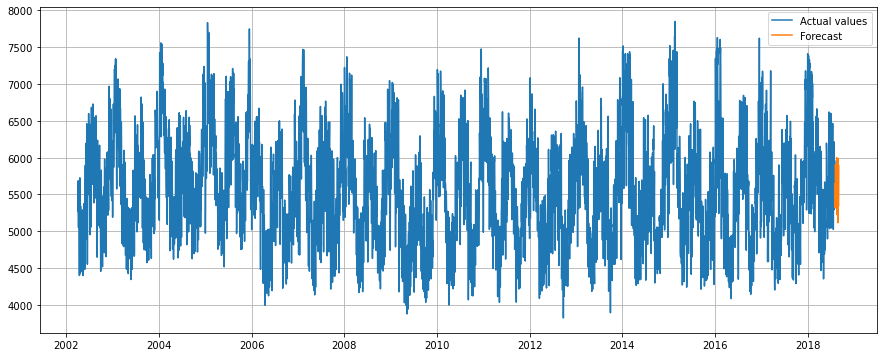

In [49]:
plt.figure(figsize=(15,6))
plt.plot(DDaily['PJMW_MW'],label='Actual values')
plt.plot(future_df,label='Forecast')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Saving the model

In [63]:
import pickle

In [64]:
filename='RF_MODELL.pkl'
pickle.dump(final_RF_modell,open(filename,'wb'))

In [67]:
pickled_model=pickle.load(open('RF_MODELL.pkl','rb'))

In [68]:
import pickle
import bz2
import random
import os

In [69]:
ofile = open("RF_MODELL.pkl",'wb')
pickle.dump(final_RF_modell, ofile)
ofile.close()
 
print(os.path.getsize("RF_MODELL.pkl"))

48287273


In [70]:
ofile = bz2.BZ2File("RF_MODELL.pkl",'wb')
pickle.dump(final_RF_modell,ofile)
ofile.close()
 
print(os.path.getsize("RF_MODELL.pkl"))

8604266
